In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

 # Dataset Description

The dataset contains details about dafaulted loans by telecom service users and associated data. The goal is to predict whether an issued loan will be defaulted or not based on the user data collected over the time.

# Features Description

In [2]:
#load and see the dataset
df = pd.read_csv("Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
#Size of the unclean dataset
df.shape

(209593, 37)

In [4]:
#Details of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

# Data Analysis: Cleaning and Visualization

We shall look into the contents of each feature and deal with them as per their relevance, visualize and make inferences

0. The Unnamed:0 column contains serial numbers and no relevant information, so let's drop it

In [5]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


1. Let's look at the distribution of defaulted loans in the dataset

1    183431
0     26162
Name: label, dtype: int64

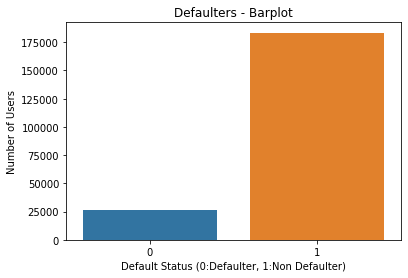

In [6]:
sns.countplot(df["label"])
plt.ylabel('Number of Users')
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.title('Defaulters - Barplot')
df['label'].value_counts()

Around 12.5% of the  total issued loans were defaulted

2. Let's look at the number of unique mobile numbers in the dataset

In [7]:
df['msisdn'].value_counts()

04581I85330    7
47819I90840    7
22038I88658    6
55809I89238    6
43096I88688    6
              ..
18570I82731    1
39493I82735    1
58928I85329    1
04102I90849    1
26296I88658    1
Name: msisdn, Length: 186243, dtype: int64

We have a total of 186243 unique mobile numbers or users in the dataset, also no user has more than 7 cases of loan

In [8]:
#Let's drop mobile number column as it has no relationship with loan default
df.drop("msisdn",axis=1,inplace=True)
df.shape

(209593, 35)

3. Let's look at the distribution of Ages of users on the Network

Text(0.5, 1.0, 'Distribution of Age of Users in the Network')

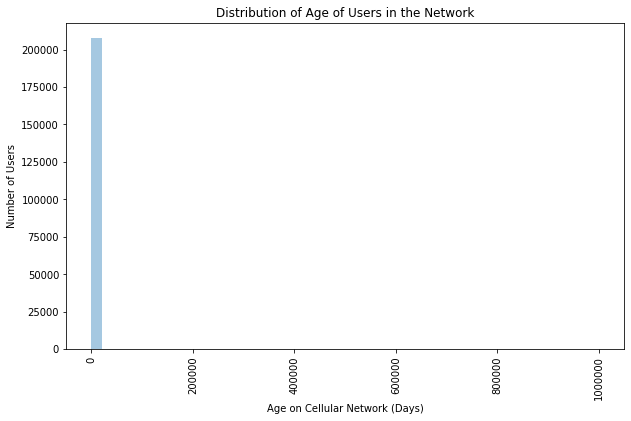

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df["aon"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Age on Cellular Network (Days)')
plt.ylabel('Number of Users')
plt.title('Distribution of Age of Users in the Network')

In [10]:
df["aon"].skew()

10.392948821587439

There are garbage values which are very high and they are distorting the visualization, also there are some negative numbers which is meaningless as we are looking at Age on Network. Let's drop all garbage/negative values and visualise again

In [11]:
df.shape

(209593, 35)

In [12]:
df = df.drop(df[(df.aon < 0) | (df.aon > 2500)].index)
df.shape

(205965, 35)

Let's look at the distribution of Ages of users on the Network again after cleaning the data

Text(0.5, 1.0, 'Distribution of Age of Users in the Network')

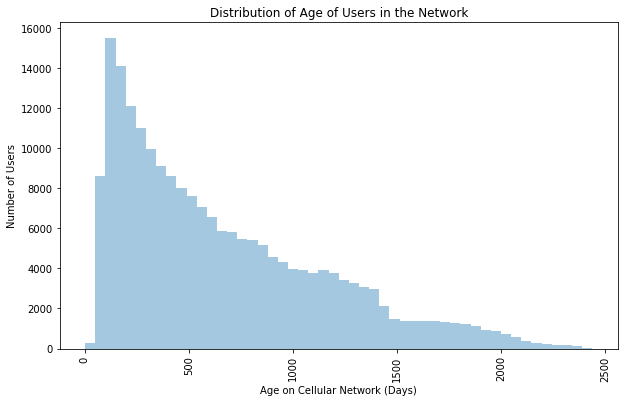

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(df["aon"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Age on Cellular Network (Days)')
plt.ylabel('Number of Users')
plt.title('Distribution of Age of Users in the Network')

The above plot is highly skewed to the right, which means that most of the users are relatively new to the network and very few users have stayed with the network for a long time, Let's look at the age on network of the defaulters

Let's compare age on network as per default status

Text(0.5, 1.0, 'Age on Network vs Default Status - Boxplot')

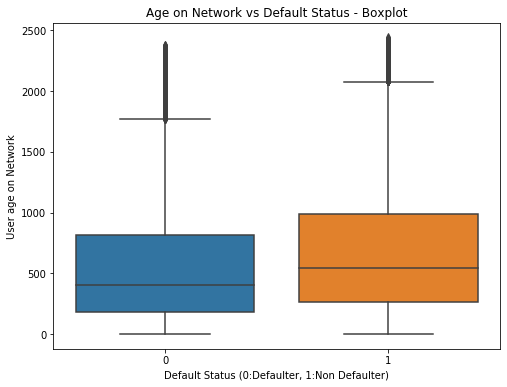

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="aon",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('User age on Network')
plt.title('Age on Network vs Default Status - Boxplot')

From the above boxplot, the defaulters have relatively lower ages on the network, this implies that long time users are generally more credible

4. Let look at the daily amount spent averaged over last 30 days and 90 days

Text(0.5, 1.0, 'Distribution of Daily amount spent averaged over last 30 days')

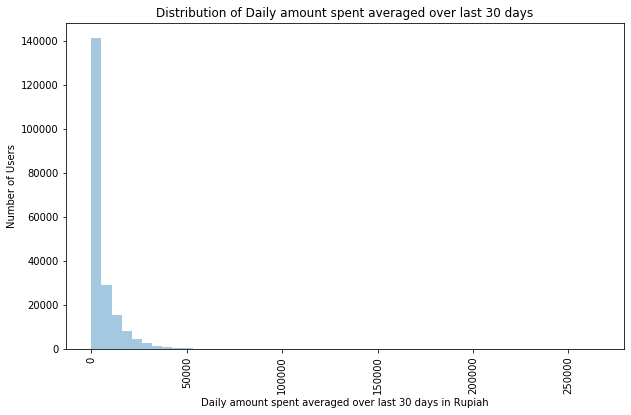

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(df["daily_decr30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Daily amount spent averaged over last 30 days in Rupiah')
plt.ylabel('Number of Users')
plt.title('Distribution of Daily amount spent averaged over last 30 days')

5.

Text(0.5, 1.0, 'Distribution of Daily amount spent averaged over last 90 days')

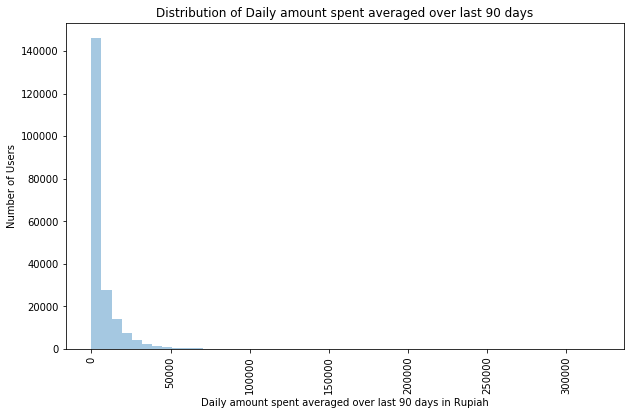

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(df["daily_decr90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Daily amount spent averaged over last 90 days in Rupiah')
plt.ylabel('Number of Users')
plt.title('Distribution of Daily amount spent averaged over last 90 days')

There are many outlier values present in the Daily amount spent averaged over last 30/90 days column i.e. extremely high values, so let's remove them

In [19]:
df.shape

(205965, 35)

In [20]:
df = df.drop(df[(df.daily_decr30 > 50000)].index)
df = df.drop(df[(df.daily_decr90 > 50000)].index)
df.shape

(203897, 35)

Let look at the daily amount spent averaged over last 30 and 90 days again after removing outliers

Text(0.5, 1.0, 'Distribution of Daily amount spent averaged over last 30 days')

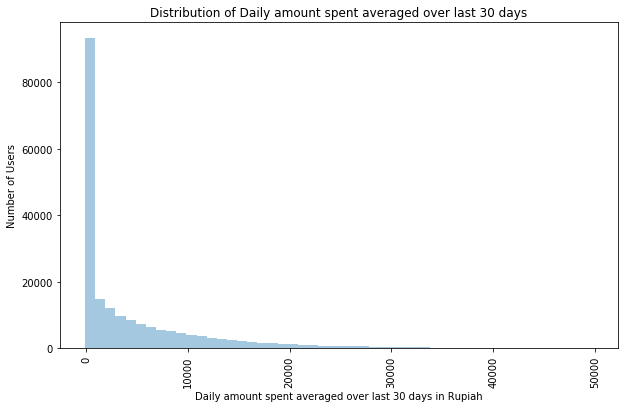

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(df["daily_decr30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Daily amount spent averaged over last 30 days in Rupiah')
plt.ylabel('Number of Users')
plt.title('Distribution of Daily amount spent averaged over last 30 days')

Text(0.5, 1.0, 'Distribution of Daily amount spent averaged over last 90 days')

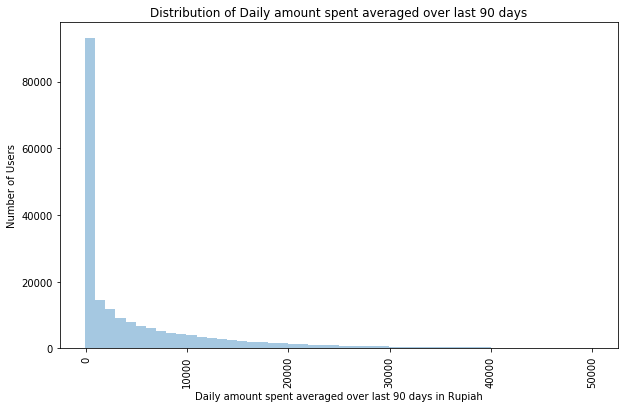

In [24]:
plt.figure(figsize=(10,6))
sns.distplot(df["daily_decr90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Daily amount spent averaged over last 90 days in Rupiah')
plt.ylabel('Number of Users')
plt.title('Distribution of Daily amount spent averaged over last 90 days')

The above plots shows that majority of the users spent lesser amounts or very few users spent very higher amounts

Let's compare daily amount spent averaged over last 30/90 days as per default status

Text(0.5, 1.0, 'Daily amount spent averaged over last 30 days in Rupiah vs Default Status - Boxplot')

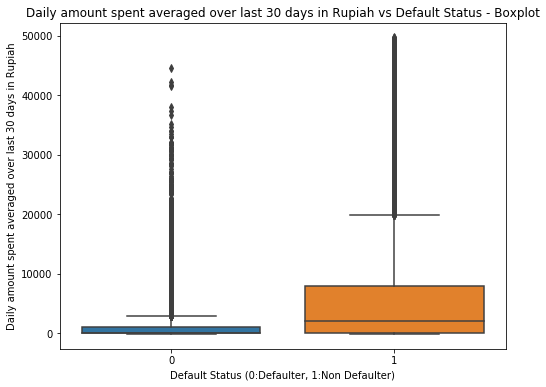

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="daily_decr30",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Daily amount spent averaged over last 30 days in Rupiah')
plt.title('Daily amount spent averaged over last 30 days in Rupiah vs Default Status - Boxplot')

Text(0.5, 1.0, 'Daily amount spent averaged over last 90 days in Rupiah vs Default Status - Boxplot')

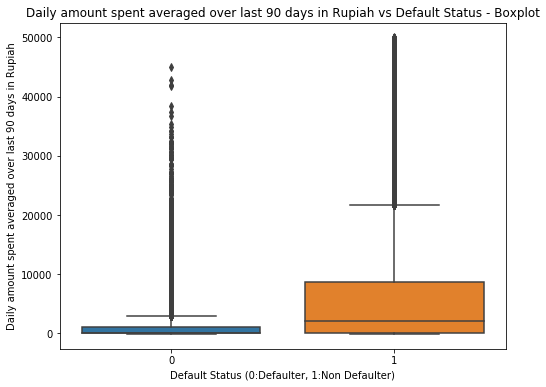

In [23]:
#Let's Daily amount spent averaged over last 90 days as per default status
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="daily_decr90",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Daily amount spent averaged over last 90 days in Rupiah')
plt.title('Daily amount spent averaged over last 90 days in Rupiah vs Default Status - Boxplot')

From the above plots, the users who defaulted have relatively lower Daily amount spent averaged over last 30 or 90 days, this means that people with higher average Daily amount spent are generally more credible

6. Let's look at the Average main account balance over last 30/90 days

Text(0.5, 1.0, 'Distribution of Average main account balance over last 30 days')

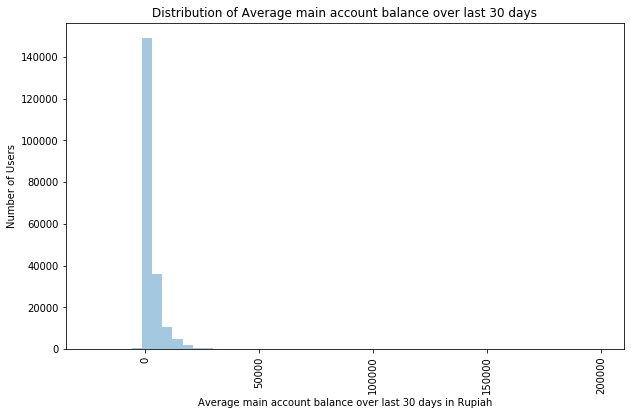

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(df["rental30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Average main account balance over last 30 days in Rupiah')
plt.ylabel('Number of Users')
plt.title('Distribution of Average main account balance over last 30 days')

7. 

Text(0.5, 1.0, 'Distribution of Average main account balance over last 90 days')

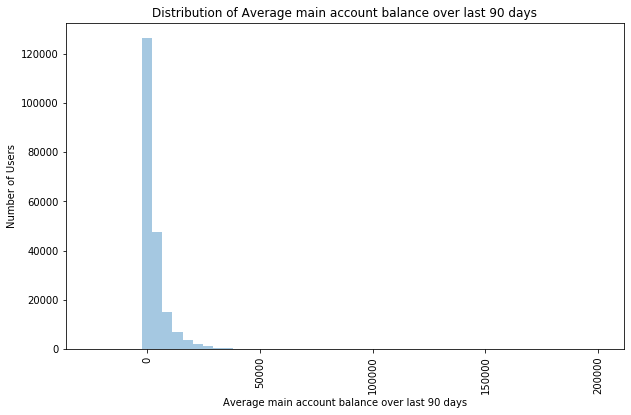

In [26]:
plt.figure(figsize=(10,6))
sns.distplot(df["rental90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Average main account balance over last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Average main account balance over last 90 days')

Very high values of Average main account balance is skewing the data let's remove all values over 50000

In [27]:
df.shape

(203897, 35)

In [28]:
#Let's drop all garbage values and visualise again
df = df.drop(df[(df.rental30 > 50000)].index)
df = df.drop(df[(df.rental90 > 50000)].index)
df.shape

(203729, 35)

Let's look at the Average main account balance over last 30/90 days again after removing outliers

Text(0.5, 1.0, 'Distribution of Average main account balance over last 30 days')

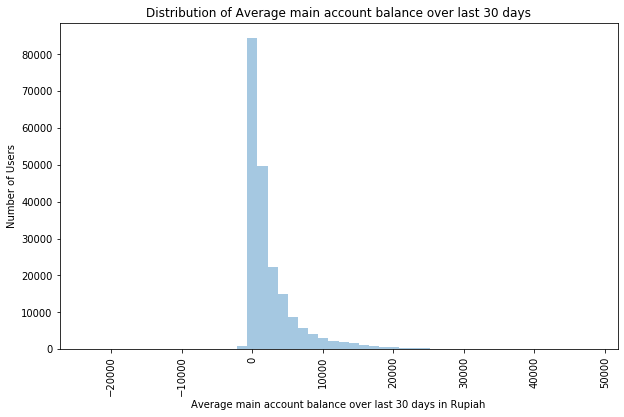

In [33]:
plt.figure(figsize=(10,6))
sns.distplot(df["rental30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Average main account balance over last 30 days in Rupiah')
plt.ylabel('Number of Users')
plt.title('Distribution of Average main account balance over last 30 days')

Text(0.5, 1.0, 'Distribution of Daily amount spent averaged over last 90 days')

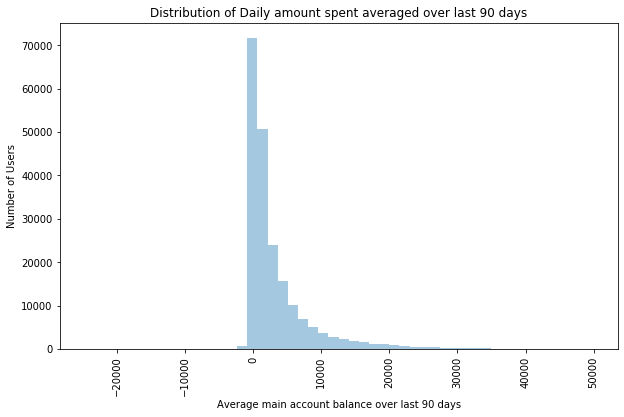

In [34]:
plt.figure(figsize=(10,6))
sns.distplot(df["rental90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Average main account balance over last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Daily amount spent averaged over last 90 days')

Most of the users have  low Average main account balance or very few users have higher balance

Let's look at Average main account balance over last 30/90 days as per default status

Text(0.5, 1.0, 'Average main account balance over last 30 days in Rupiah vs Default Status - Boxplot')

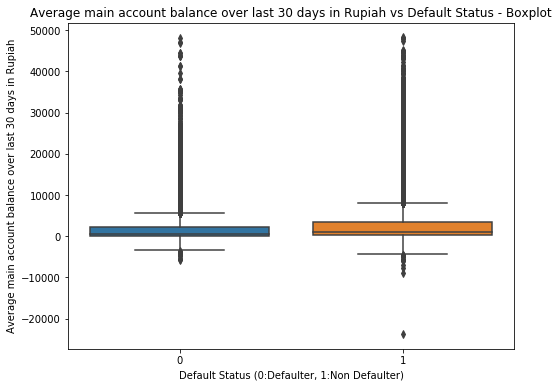

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="rental30",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Average main account balance over last 30 days in Rupiah')
plt.title('Average main account balance over last 30 days in Rupiah vs Default Status - Boxplot')

Text(0.5, 1.0, 'Average main account balance over last 90 days in Rupiah vs Default Status - Boxplot')

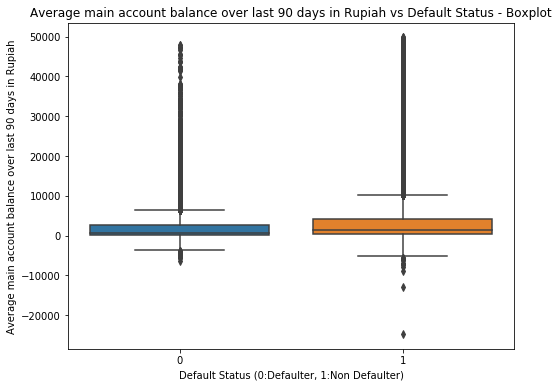

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="rental90",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Average main account balance over last 90 days in Rupiah')
plt.title('Average main account balance over last 90 days in Rupiah vs Default Status - Boxplot')

From the above plots, Average main account balance over last 30/90 days is relatively lower for the defaulters, this implies that people with higher average main account balance are generally more credible

8. Let's look at the Number of days till last recharge of main and data account

Text(0.5, 1.0, 'Distribution of Number of days till last recharge of main account')

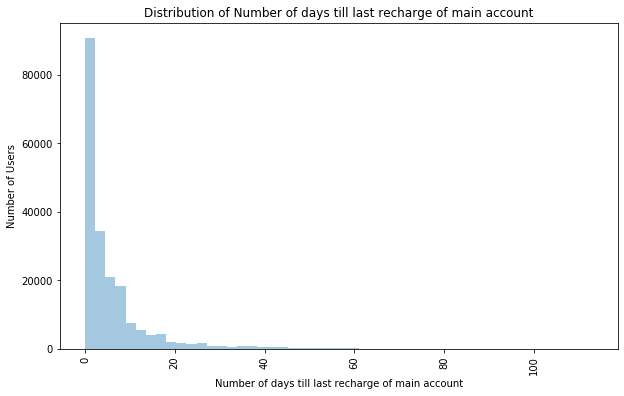

In [43]:
plt.figure(figsize=(10,6))
sns.distplot(df["last_rech_date_ma"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Number of days till last recharge of main account')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of days till last recharge of main account')

9. 

Text(0.5, 1.0, 'Distribution of Number of days till last recharge of data account')

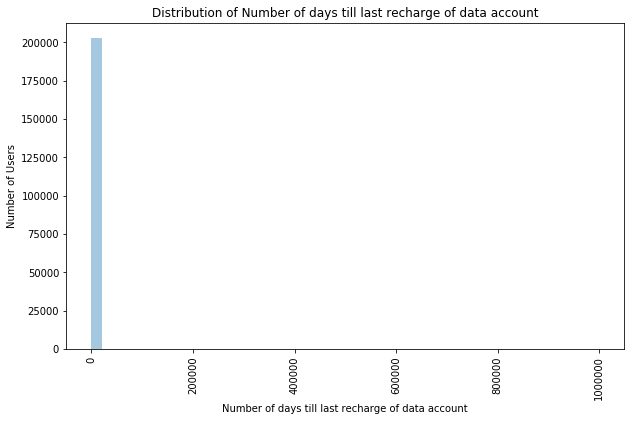

In [38]:
plt.figure(figsize=(10,6))
sns.distplot(df["last_rech_date_da"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Number of days till last recharge of data account')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of days till last recharge of data account')

Number of days till last recharge of main/data account columns contain a lot of garbage values i.e. extremely high float numbers and negative numbers so let's drop them

In [39]:
df.shape

(203729, 35)

In [40]:
#Let's drop all garbage values and visualise again
df = df.drop(df[(df.last_rech_date_ma < 0) | (df.last_rech_date_ma > 200)].index)
df = df.drop(df[(df.last_rech_date_da < 0) | (df.last_rech_date_da > 200)].index)
df.shape

(200386, 35)

Let's look at the Number of days till last recharge of main and data account after removing garbage values

Text(0.5, 1.0, 'Distribution of Number of days till last recharge of main account')

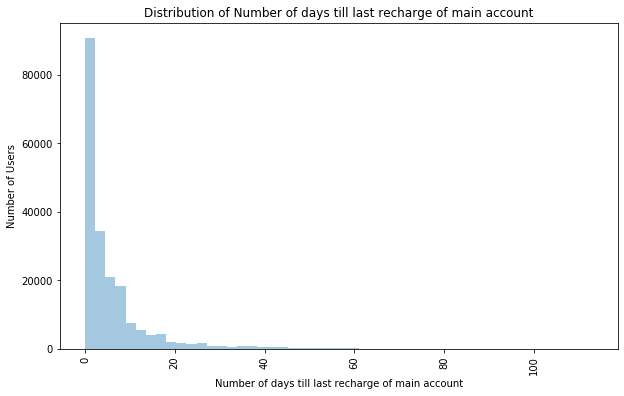

In [41]:

plt.figure(figsize=(10,6))
sns.distplot(df["last_rech_date_ma"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Number of days till last recharge of main account')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of days till last recharge of main account')

The above plots shows that most of the users recharge frequently and very few users recharge after long periods

Text(0.5, 1.0, 'Distribution of Number of days till last recharge of data account')

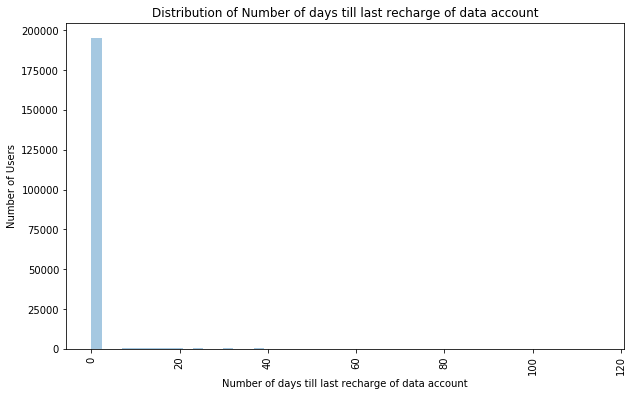

In [37]:
plt.figure(figsize=(10,6))
sns.distplot(df["last_rech_date_da"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Number of days till last recharge of data account')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of days till last recharge of data account')

Even after cleaning, the Number of days till last recharge of data account does not provide any inferences as most of the data points have zero as value, so let's drop it

In [38]:
df.shape

(200386, 35)

In [39]:
df.drop("last_rech_date_da", axis=1,inplace=True)
df.shape

(200386, 34)

Let's look at the Number of days till last recharge of main account as per default status

Text(0.5, 1.0, 'Number of days till last recharge of main account vs Default Status - Boxplot')

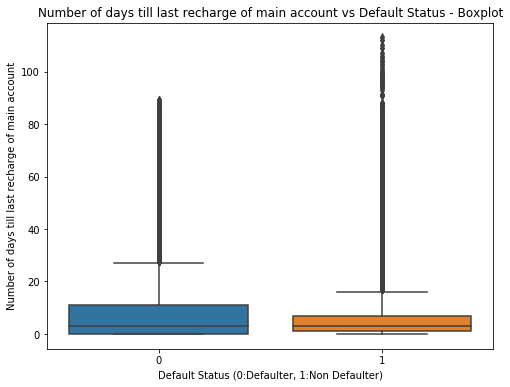

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="last_rech_date_ma",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Number of days till last recharge of main account')
plt.title('Number of days till last recharge of main account vs Default Status - Boxplot')

The defaulters have relatively higher periods without recharge, this implies that people who recharge frequently are generally more credible

10. Let's look at the Amount of last recharge of main account (in Indonesian Rupiah)

Text(0.5, 1.0, 'Distribution of Amount of last recharge of main account')

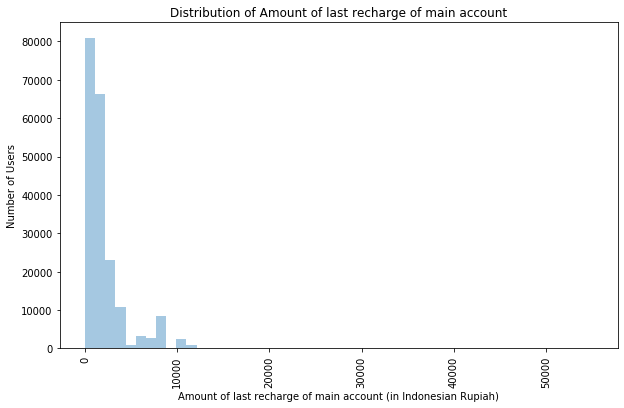

In [45]:
plt.figure(figsize=(10,6))
sns.distplot(df["last_rech_amt_ma"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Amount of last recharge of main account (in Indonesian Rupiah)')
plt.ylabel('Number of Users')
plt.title('Distribution of Amount of last recharge of main account')

Amount of last recharge of main account (in Indonesian Rupiah) contains many outliers, let's remove all the values over 13000 Rupiah

In [46]:
df.shape

(200386, 35)

In [47]:
df = df.drop(df[(df.last_rech_amt_ma > 13000)].index)
df.shape

(200164, 35)

Let's visualize the Amount of last recharge of main account again after removing outliers

Text(0.5, 1.0, 'Distribution of Amount of last recharge of main account')

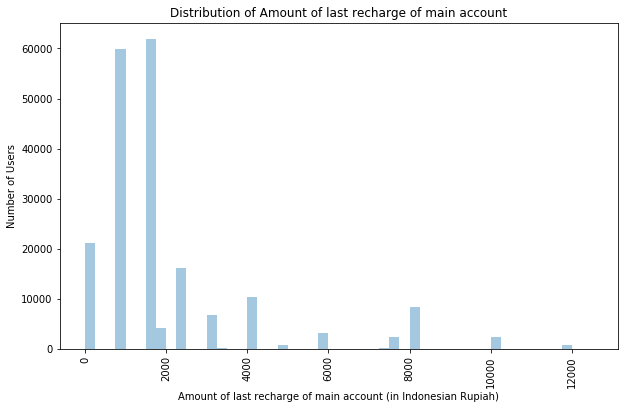

In [48]:
plt.figure(figsize=(10,6))
sns.distplot(df["last_rech_amt_ma"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Amount of last recharge of main account (in Indonesian Rupiah)')
plt.ylabel('Number of Users')
plt.title('Distribution of Amount of last recharge of main account')

Majority of the users' Amount of last recharge of main account are relatively lower

Let's look at the Amount of last recharge of main account as per default status

Text(0.5, 1.0, 'Amount of last recharge of main account (in Indonesian Rupiah) vs Default Status - Boxplot')

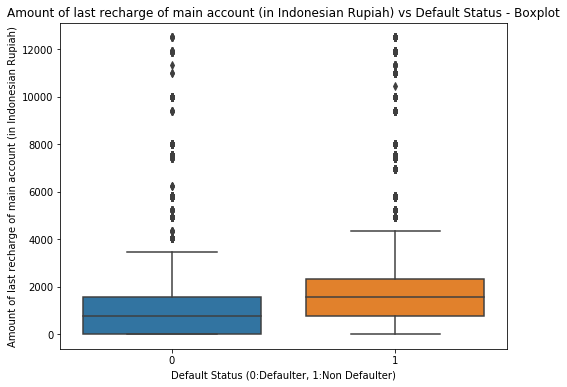

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="last_rech_amt_ma",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Amount of last recharge of main account (in Indonesian Rupiah)')
plt.title('Amount of last recharge of main account (in Indonesian Rupiah) vs Default Status - Boxplot')

The defaulters have relatively lower values for Amount of last recharge of main account, it also implies that users who recharge higher amounts are generally more credible

11. Let's look at the Number of times main account got recharged in last 30 days

Text(0.5, 1.0, 'Distribution of Number of times main account got recharged in last 30 days')

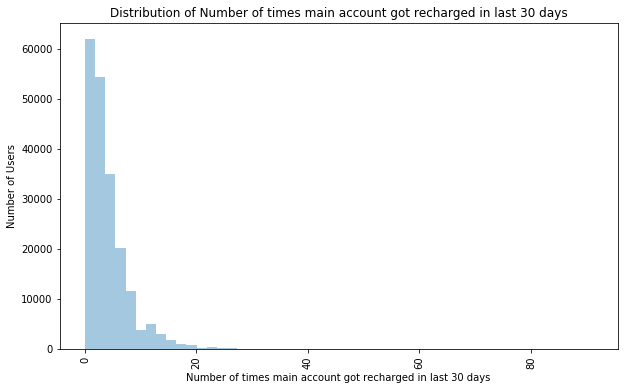

In [50]:
plt.figure(figsize=(10,6))
sns.distplot(df["cnt_ma_rech30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Number of times main account got recharged in last 30 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of times main account got recharged in last 30 days')

The distribution of Number of times main account got recharged in last 30 days is very skewed, let's remove all values over 30

In [51]:
df.shape

(200164, 35)

In [52]:
df = df.drop(df[(df.cnt_ma_rech30 > 30)].index)
df.shape

(199922, 35)

Let's look at the Number of times main account got recharged in last 30 days again after removing outliers

Text(0.5, 1.0, 'Distribution of Number of times main account got recharged in last 30 days')

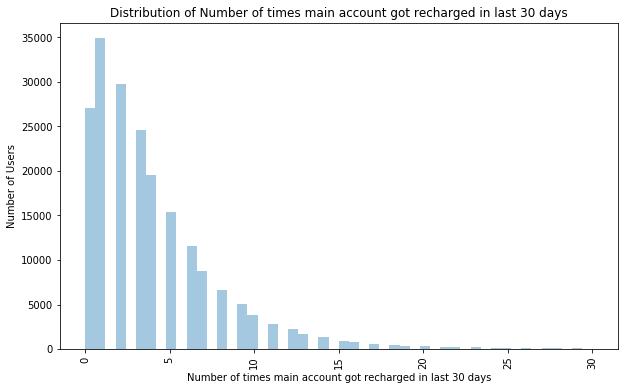

In [53]:
plt.figure(figsize=(10,6))
sns.distplot(df["cnt_ma_rech30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Number of times main account got recharged in last 30 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of times main account got recharged in last 30 days')

The above distribution is highly skewed to the right which means that very few users recharged higher number of times over the last 30 days

Let's look at the Number of times main account got recharged in last 30 days as per default status

Text(0.5, 1.0, 'Number of times main account got recharged in last 30 days vs Default Status - Boxplot')

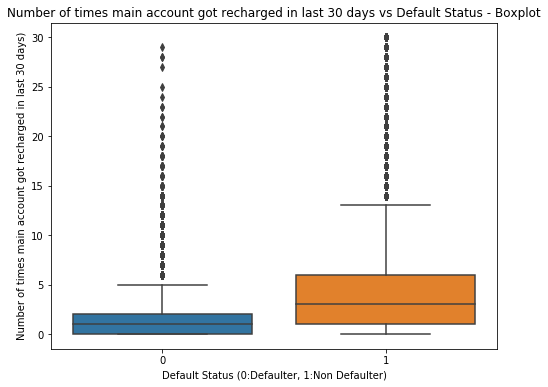

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="cnt_ma_rech30",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Number of times main account got recharged in last 30 days)')
plt.title('Number of times main account got recharged in last 30 days vs Default Status - Boxplot')

From the above plot, clearly the defaulters have relatively lesser Number of times main account was recharged in last 30 days, this implies that users who recharge higher number of times are generally more reliable

12. Let look at the Frequency of main account recharged in last 30 days

Text(0.5, 1.0, 'Distribution of Frequency of main account recharged in last 30 days')

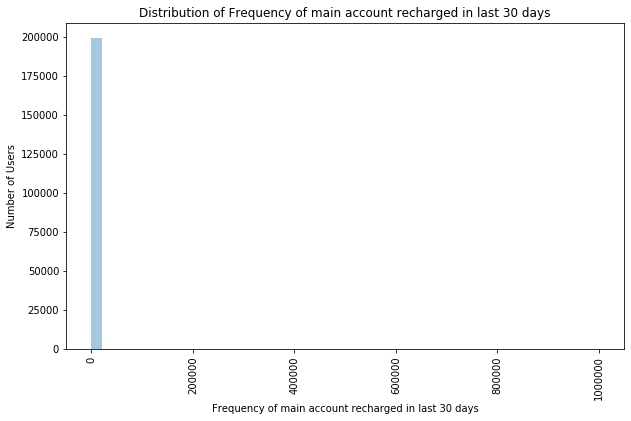

In [51]:
plt.figure(figsize=(10,6))
sns.distplot(df["fr_ma_rech30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Frequency of main account recharged in last 30 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Frequency of main account recharged in last 30 days')

The Frequency of main account recharged in last 30 days has a lot of garbage values i.e. extremely high float numbers, so let's remove them

In [52]:
df.shape

(199922, 34)

In [53]:
df = df.drop(df[(df.fr_ma_rech30 > 39)].index)
df.shape

(198917, 34)

Let's look at the Frequency of main account recharged in last 30 days again after removing outliers

Text(0.5, 1.0, 'Distribution of Frequency of main account recharged in last 30 days')

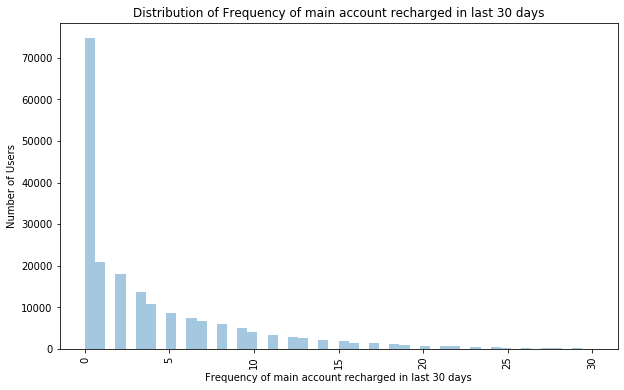

In [54]:
plt.figure(figsize=(10,6))
sns.distplot(df["fr_ma_rech30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Frequency of main account recharged in last 30 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Frequency of main account recharged in last 30 days')

Most of the users' frequency of recharge over the last 30 days are relatively lower

Let's look at the Frequency of main account recharged in last 30 days as per default status

Text(0.5, 1.0, 'Frequency of main account recharged in last 30 days vs Default Status - Boxplot')

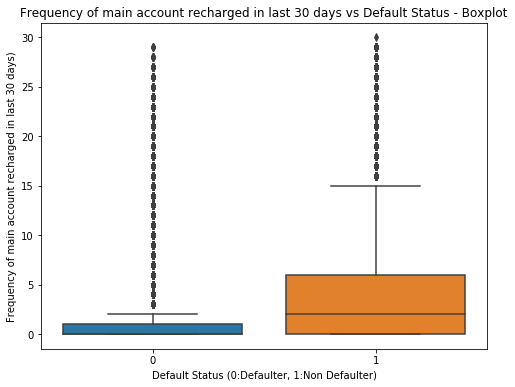

In [55]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="fr_ma_rech30",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Frequency of main account recharged in last 30 days)')
plt.title('Frequency of main account recharged in last 30 days vs Default Status - Boxplot')

From the above plot, clearly the defaulters have relatively lesser Frequency of main account recharged in last 30 days, this implies that users who recharge more frequently are generally more reliable

13. Let's look at the Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

Text(0.5, 1.0, 'Distribution of Total amount of recharge in main account over last 30 days')

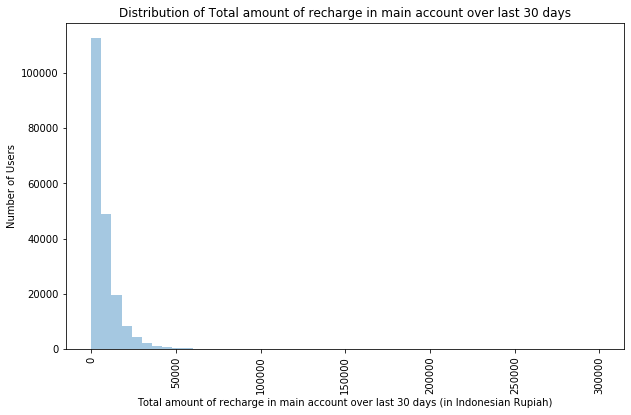

In [56]:
plt.figure(figsize=(10,6))
sns.distplot(df["sumamnt_ma_rech30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)')
plt.ylabel('Number of Users')
plt.title('Distribution of Total amount of recharge in main account over last 30 days')

The Total amount of recharge in main account over last 30 days column is very skewed so let's remove the outliers

In [57]:
df.shape

(198917, 34)

In [58]:
df = df.drop(df[(df.sumamnt_ma_rech30 > 60000)].index)
df.shape

(198497, 34)

Let's look at the Total amount of recharge in main account over last 30 days again after removing outliers

Text(0.5, 1.0, 'Distribution of Total amount of recharge in main account over last 30 days')

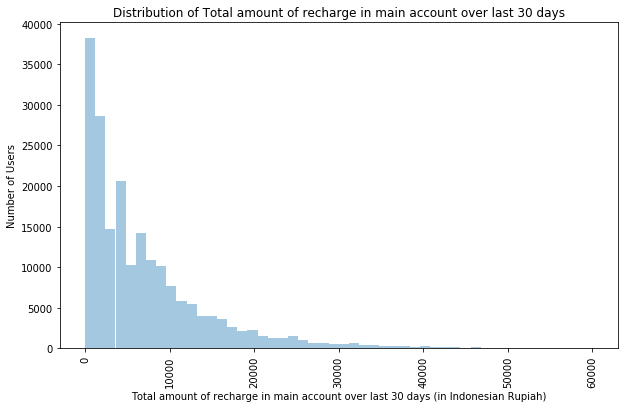

In [59]:
plt.figure(figsize=(10,6))
sns.distplot(df["sumamnt_ma_rech30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)')
plt.ylabel('Number of Users')
plt.title('Distribution of Total amount of recharge in main account over last 30 days')

From the above plot, majority of the users have low values of Total amount of recharge in main account over last 30 days

Let's look at the Total amount of recharge in main account over last 30 days as per default status

Text(0.5, 1.0, 'Total amount of recharge in main account over last 30 days vs Default Status - Boxplot')

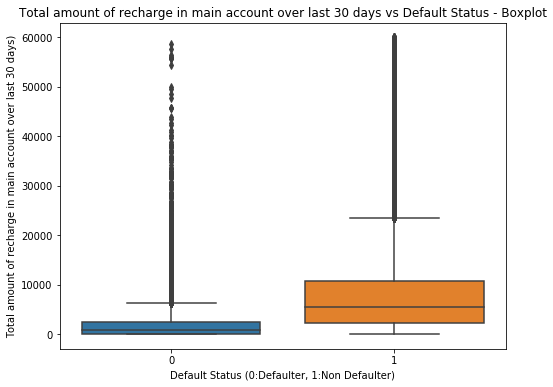

In [60]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="sumamnt_ma_rech30",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Total amount of recharge in main account over last 30 days)')
plt.title('Total amount of recharge in main account over last 30 days vs Default Status - Boxplot')

Clearly the defaulters have reatively very less Total amount of recharge in main account over last 30 days, this implies that people who recharge higher total amounts over a period are generally more reliable

14. Let's look at the Median of amount of recharges done in main account over last 30 days at user level

Text(0.5, 1.0, 'Distribution of Median of amount of recharges done in main account over last 30 days at user level')

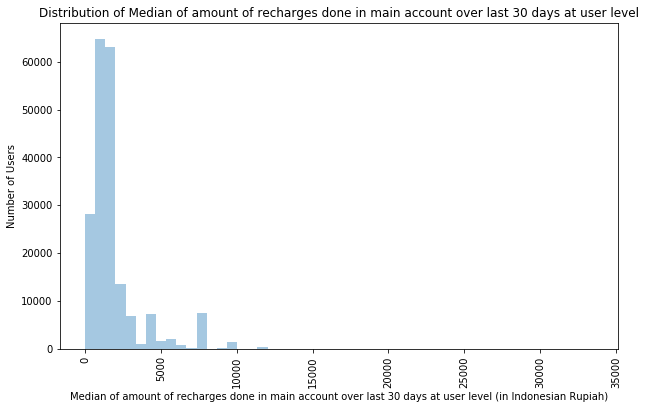

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(df["medianamnt_ma_rech30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)')
plt.ylabel('Number of Users')
plt.title('Distribution of Median of amount of recharges done in main account over last 30 days at user level')

The Median of amount of recharges done in main account over last 30 days at user level column contains a lot of higher values which are skewing the data, so let's drop all rentries over 13000

In [56]:
df.shape

(199922, 35)

In [57]:
df = df.drop(df[(df.medianamnt_ma_rech30 > 13000)].index)
df.shape

(199884, 35)

Let's look at the Median of amount of recharges done in main account over last 30 days at user level again after removing outliers

Text(0.5, 1.0, 'Distribution of Median of amount of recharges done in main account over last 30 days at user level')

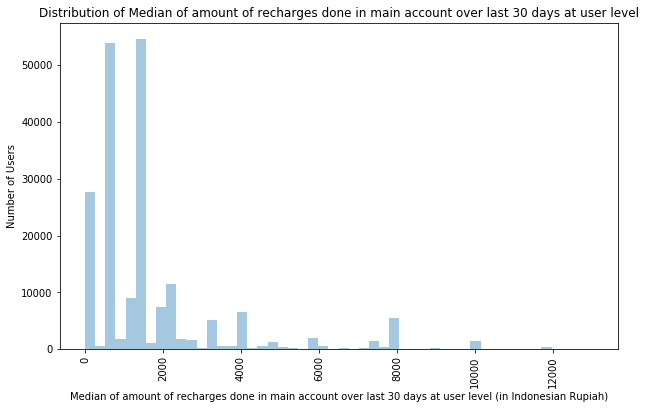

In [58]:
plt.figure(figsize=(10,6))
sns.distplot(df["medianamnt_ma_rech30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)')
plt.ylabel('Number of Users')
plt.title('Distribution of Median of amount of recharges done in main account over last 30 days at user level')

The Median of amount of recharges done in main account over last 30 days at user level has very few higher values, or majority of the median recharge amounts are low

Let's look at the Median of amount of recharges done in main account over last 30 days at user level as per default status

Text(0.5, 1.0, 'Median of amount of recharges done in main account over last 30 days vs Default Status - Boxplot')

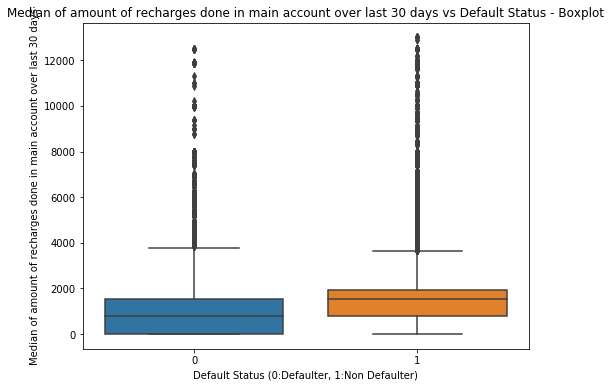

In [59]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="medianamnt_ma_rech30",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Median of amount of recharges done in main account over last 30 days')
plt.title('Median of amount of recharges done in main account over last 30 days vs Default Status - Boxplot')

The median recharge amount is relatively lower for defaulters, this implies that users with high medain recharge amounts are generally more reliable

15. Let look at the Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

Text(0.5, 1.0, 'Distribution of Median of main account balance just before recharge in last 30 days at user level')

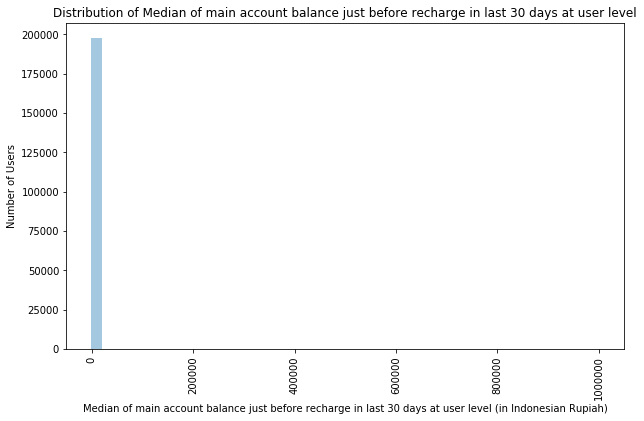

In [66]:
plt.figure(figsize=(10,6))
sns.distplot(df["medianmarechprebal30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)')
plt.ylabel('Number of Users')
plt.title('Distribution of Median of main account balance just before recharge in last 30 days at user level')

The Median of main account balance just before recharge in last 30 days at user level column contains a lot of higher values which are skewing the data, so let's drop all entries over 10000

In [69]:
df.shape

(197481, 34)

In [70]:
df = df.drop(df[(df.medianmarechprebal30 > 10000)].index)
df.shape

(197481, 34)

Let's look at the Median of main account balance just before recharge in last 30 days at user level again after removing outliers

Text(0.5, 1.0, 'Distribution of Median of main account balance just before recharge in last 30 days at user level')

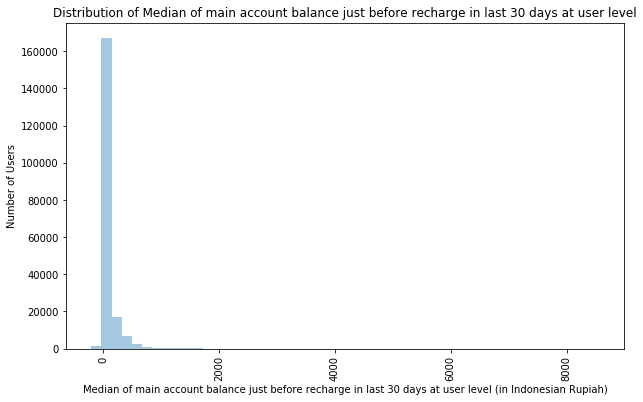

In [71]:
plt.figure(figsize=(10,6))
sns.distplot(df["medianmarechprebal30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)')
plt.ylabel('Number of Users')
plt.title('Distribution of Median of main account balance just before recharge in last 30 days at user level')

The above plot shows that a very high majority of data points are zero and this feature does not reveal anything, so let's drop it

In [72]:
df.shape

(197481, 34)

In [73]:
df.drop("medianmarechprebal30", axis=1,inplace=True)
df.shape

(197481, 33)

16. Let's look at the Number of times main account got recharged in last 90 days

Text(0.5, 1.0, 'Distribution of Number of times main account got recharged in last 90 days')

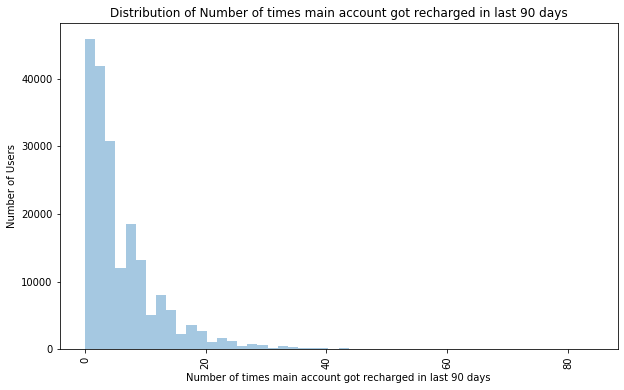

In [74]:
plt.figure(figsize=(10,6))
sns.distplot(df["cnt_ma_rech90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Number of times main account got recharged in last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of times main account got recharged in last 90 days')

Number of times main account got recharged in last 90 days column contains a lot of high outlier values, so let's drop them

In [75]:
df.shape

(197481, 33)

In [76]:
df = df.drop(df[(df.cnt_ma_rech90 > 50)].index)
df.shape

(197356, 33)

Let's look at the Number of times main account got recharged in last 90 days again after removing outliers

Text(0.5, 1.0, 'Distribution of Number of times main account got recharged in last 90 days')

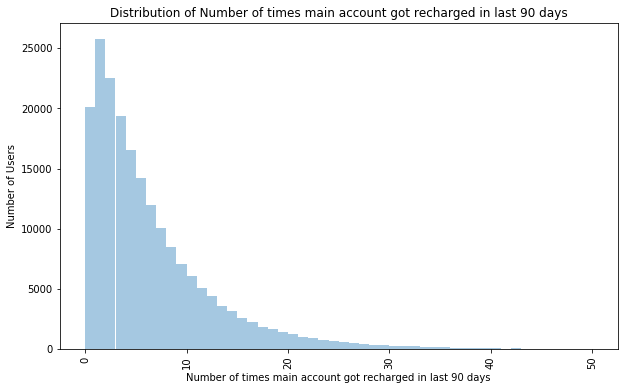

In [77]:
plt.figure(figsize=(10,6))
sns.distplot(df["cnt_ma_rech90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Number of times main account got recharged in last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of times main account got recharged in last 90 days')

The above plot is highly skewed to the right which means that very few people recharged higher number of times over the last 90 days or majority of the users recharged relatively lesser number of times

Let's look at the Number of times main account got recharged in last 90 days as per default status

Text(0.5, 1.0, 'Number of times main account got recharged in last 90 days vs Default Status - Boxplot')

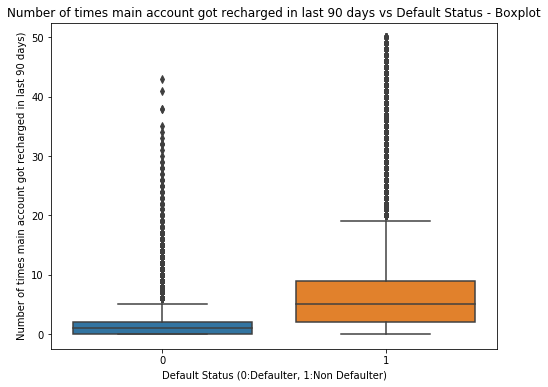

In [78]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="cnt_ma_rech90",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Number of times main account got recharged in last 90 days)')
plt.title('Number of times main account got recharged in last 90 days vs Default Status - Boxplot')

From the above boxplot, clearly the defaulters have relatively very less Number of times main account got recharged in last 90 days this implies that people who recharge higher number of times over a period are generally more credible

17. Let's look at the Frequency of main account recharged in last 90 days

Text(0.5, 1.0, 'Distribution of Frequency of main account recharged in last 90 days')

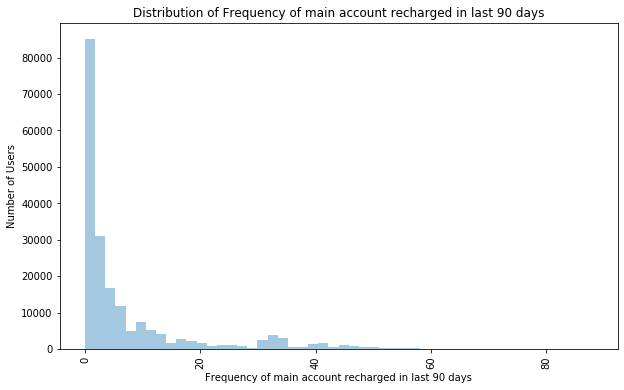

In [54]:
plt.figure(figsize=(10,6))
sns.distplot(df["fr_ma_rech90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Frequency of main account recharged in last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Frequency of main account recharged in last 90 days')

Frequency of main account recharged in last 90 days column contains a lot of high outlier values, so let's drop them

In [80]:
df.shape

(197356, 33)

In [82]:
df = df.drop(df[(df.fr_ma_rech90 > 60)].index)
df.shape

(196379, 33)

Let look at the Frequency of main account recharged in last 90 days

Text(0.5, 1.0, 'Distribution of Frequency of main account recharged in last 90 days')

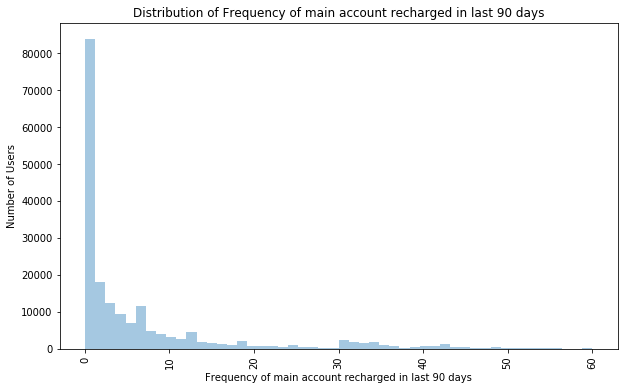

In [83]:
plt.figure(figsize=(10,6))
sns.distplot(df["fr_ma_rech90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Frequency of main account recharged in last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Frequency of main account recharged in last 90 days')

The above plot shows that majority of the users recharged lesses number of times over the last 90 days

Let's look at the Frequency of main account recharged in last 90 days as per default status

Text(0.5, 1.0, 'Frequency of main account recharged in last 90 days vs Default Status - Boxplot')

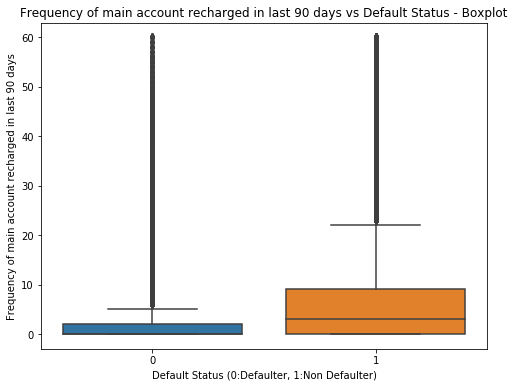

In [84]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="fr_ma_rech90",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Frequency of main account recharged in last 90 days')
plt.title('Frequency of main account recharged in last 90 days vs Default Status - Boxplot')

From the above boxplot, clearly the defaulters have relatively very less Frequency of main account recharged in last 90 days this implies that people who recharge very frequently over a period are generally more credible

18. Let look at the Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

Text(0.5, 1.0, 'Distribution of Total amount of recharge in main account over last 90 days')

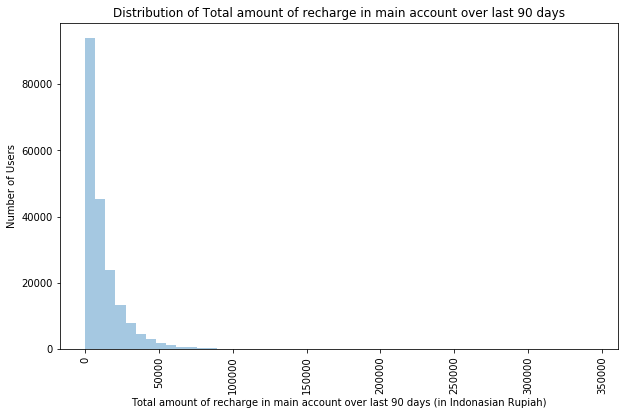

In [85]:
plt.figure(figsize=(10,6))
sns.distplot(df["sumamnt_ma_rech90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)')
plt.ylabel('Number of Users')
plt.title('Distribution of Total amount of recharge in main account over last 90 days')

Total amount of recharge in main account over last 90 days column contains a lot of garbage values i.e. extremely high numbers, so let's drop them 

In [86]:
df.shape

(196379, 33)

In [88]:
df = df.drop(df[(df.sumamnt_ma_rech90 > 100000)].index)
df.shape

(196283, 33)

Let's look at the Total amount of recharge in main account over last 90 days (in Indonasian Rupiah) again after removing outliers

Text(0.5, 1.0, 'Distribution of Total amount of recharge in main account over last 90 days')

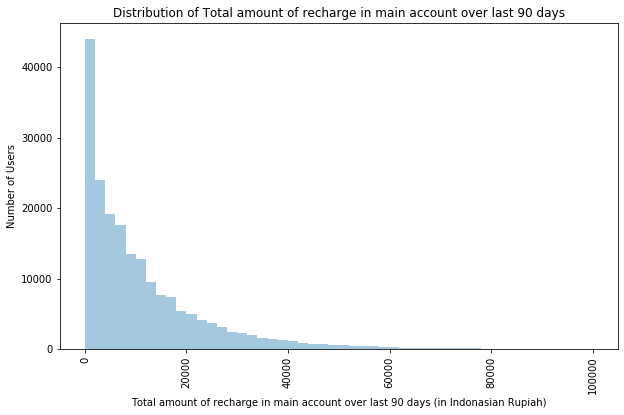

In [90]:
plt.figure(figsize=(10,6))
sns.distplot(df["sumamnt_ma_rech90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)')
plt.ylabel('Number of Users')
plt.title('Distribution of Total amount of recharge in main account over last 90 days')

The above plot reveals that majority of the users have lesser Total amount of recharge in main account over last 90 days

Let's look at the Total amount of recharge in main account over last 90 days as per default status

Text(0.5, 1.0, 'Total amount of recharge in main account over last 90 days vs Default Status - Boxplot')

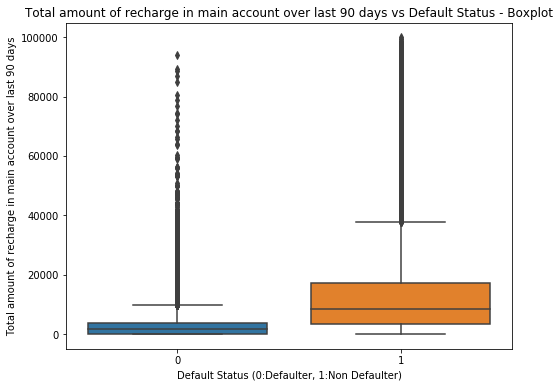

In [91]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="sumamnt_ma_rech90",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Total amount of recharge in main account over last 90 days')
plt.title('Total amount of recharge in main account over last 90 days vs Default Status - Boxplot')

From the above plots, Total amount of recharge in main account over last 90 days is relatively very low for the defaulters, this implies that people with higher Total amount of recharge in main account over a period are generally more credible

19. Let's look at the Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

Text(0.5, 1.0, 'Distribution of Median of amount of recharges done in main account over last 90 days at user level')

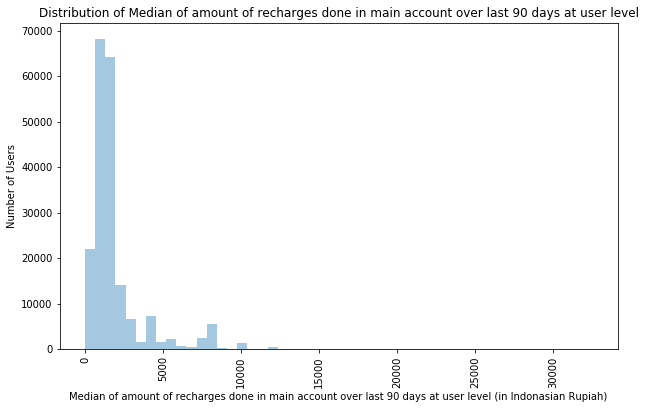

In [60]:
plt.figure(figsize=(10,6))
sns.distplot(df["medianamnt_ma_rech90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)')
plt.ylabel('Number of Users')
plt.title('Distribution of Median of amount of recharges done in main account over last 90 days at user level')

Median of amount of recharges done in main account over last 90 days at user level column contains a lot of garbage values i.e. very high numbers, so let's drop them 

In [61]:
df.shape

(199884, 35)

In [62]:
df = df.drop(df[(df.medianamnt_ma_rech90 > 12600)].index)
df.shape

(199864, 35)

Let's look at the Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

Text(0.5, 1.0, 'Distribution of Median of amount of recharges done in main account over last 90 days at user level')

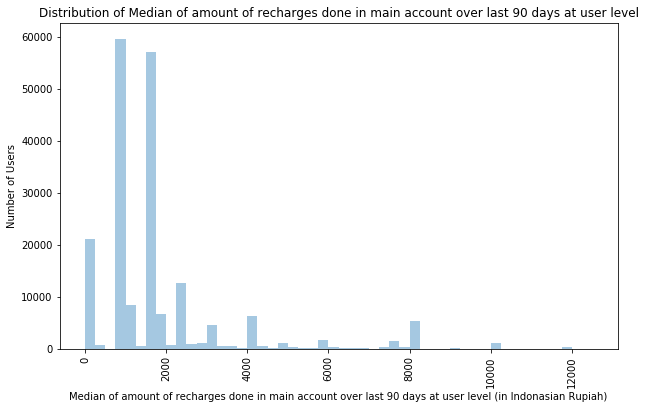

In [63]:
plt.figure(figsize=(10,6))
sns.distplot(df["medianamnt_ma_rech90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)')
plt.ylabel('Number of Users')
plt.title('Distribution of Median of amount of recharges done in main account over last 90 days at user level')

From the above plot, majority of the users have lower values for Median of amount of recharges done in main account over last 90 days at user level

Let's look at the Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

Text(0.5, 1.0, 'Median of amount of recharges done in main account over last 90 days vs Default Status - Boxplot')

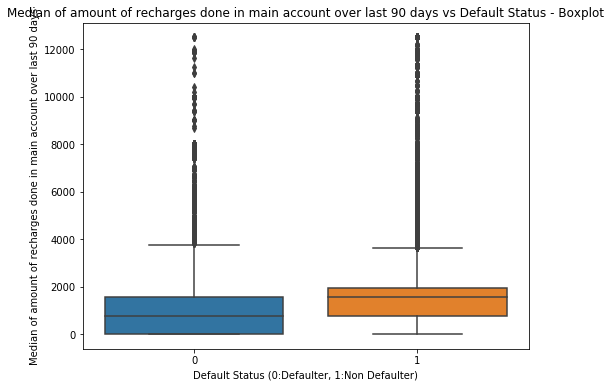

In [64]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="medianamnt_ma_rech90",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Median of amount of recharges done in main account over last 90 days')
plt.title('Median of amount of recharges done in main account over last 90 days vs Default Status - Boxplot')

From the above plots, Median of amount of recharges done in main account over last 90 days is relatively lower for the defaulters, this implies that people with higher Median of amount of recharges are generally more credible

20. Let's look at the Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

Text(0.5, 1.0, 'Distribution of Median of main account balance just before recharge in last 90 days at user level')

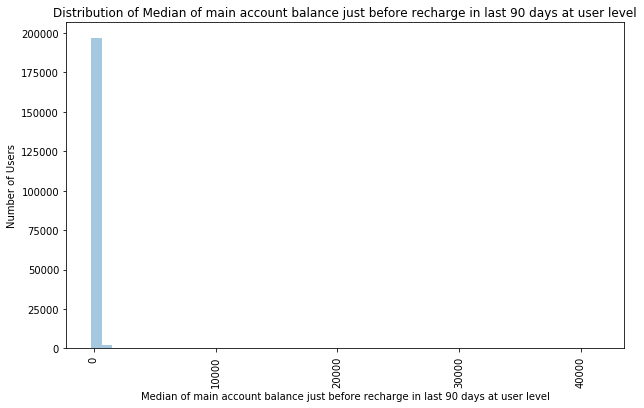

In [65]:
plt.figure(figsize=(10,6))
sns.distplot(df["medianmarechprebal90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Median of main account balance just before recharge in last 90 days at user level')
plt.ylabel('Number of Users')
plt.title('Distribution of Median of main account balance just before recharge in last 90 days at user level')

Median of main account balance just before recharge in last 90 days at user level column contains a lot of garbage values i.e. extremely high numbers, so let's drop them

In [66]:
df.shape

(199864, 35)

In [67]:
df = df.drop(df[(df.medianmarechprebal90 > 1000)].index)
df.shape

(198456, 35)

Let's look at the Median of main account balance just before recharge in last 90 days at user level again after removing outliers

Text(0.5, 1.0, 'Distribution of Median of main account balance just before recharge in last 90 days at user level')

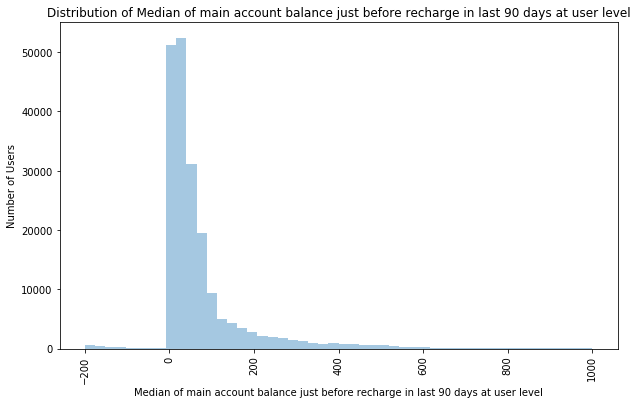

In [68]:
plt.figure(figsize=(10,6))
sns.distplot(df["medianmarechprebal90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Median of main account balance just before recharge in last 90 days at user level')
plt.ylabel('Number of Users')
plt.title('Distribution of Median of main account balance just before recharge in last 90 days at user level')

From the above plot, majority of the users have low values for Median of main account balance just before recharge in last 90 days at user level

Let's look at the Median of main account balance just before recharge in last 90 days at user level as per default status

Text(0.5, 1.0, 'Median of main account balance just before recharge in last 90 days vs Default Status - Boxplot')

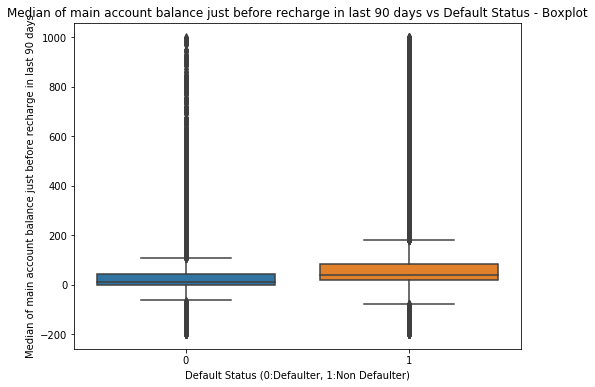

In [69]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="medianmarechprebal90",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Median of main account balance just before recharge in last 90 days')
plt.title('Median of main account balance just before recharge in last 90 days vs Default Status - Boxplot')

From the above plots, Median of main account balance just before recharge in last 90 days is relatively lower for the defaulters, this implies that people with higher Median of main account balance just before recharge are generally more credible

21. Let look at the Number of times data account got recharged in last 30 days

Text(0.5, 1.0, 'Distribution of Number of times data account got recharged in last 30 days')

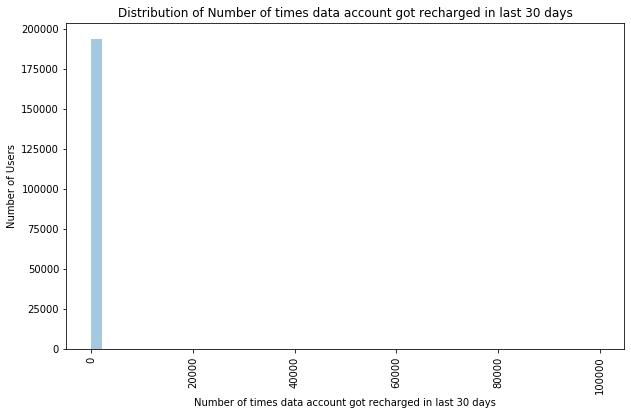

In [106]:
plt.figure(figsize=(10,6))
sns.distplot(df["cnt_da_rech30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Number of times data account got recharged in last 30 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of times data account got recharged in last 30 days')

Number of times data account got recharged in last 30 days column contains a lot of garbage values i.e. extremely high numbers, so let's drop them

In [107]:
df.shape

(194896, 33)

In [108]:
df = df.drop(df[(df.cnt_da_rech30 > 40)].index)
df.shape

(193913, 33)

Let look at the Number of times data account got recharged in last 30 days again after removing outliers

Text(0.5, 1.0, 'Distribution of Number of times data account got recharged in last 30 days')

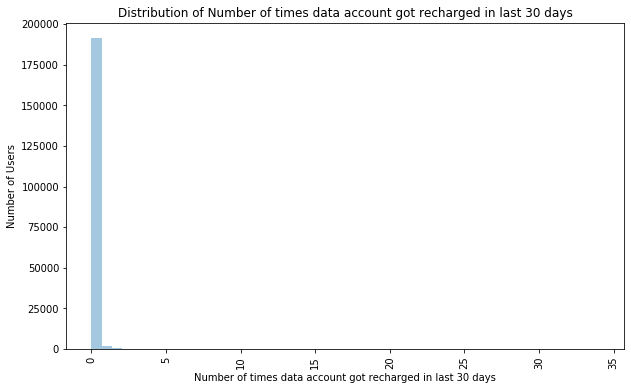

In [109]:

plt.figure(figsize=(10,6))
sns.distplot(df["cnt_da_rech30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Number of times data account got recharged in last 30 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of times data account got recharged in last 30 days')

The above plot shows that a very high majority of data points are zero and this feature does not reveal anything, so let's drop it

In [110]:
df.shape

(193913, 33)

In [111]:
df.drop("cnt_da_rech30", axis=1,inplace=True)
df.shape

(193913, 32)

22. Let's look at the Frequency of data account recharged in last 30 days

Text(0.5, 1.0, 'Distribution of Frequency of data account recharged in last 30 days')

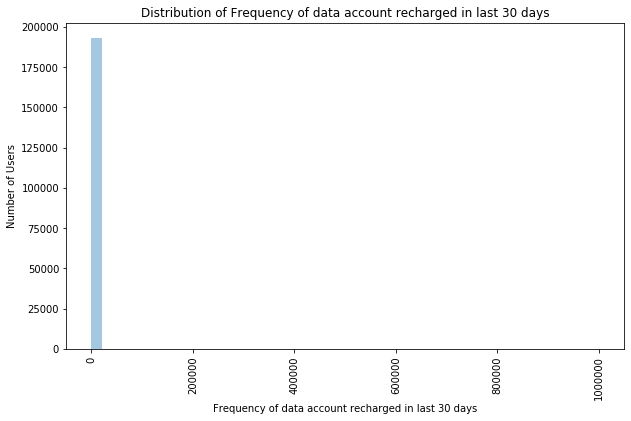

In [112]:
plt.figure(figsize=(10,6))
sns.distplot(df["fr_da_rech30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Frequency of data account recharged in last 30 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Frequency of data account recharged in last 30 days')

Removing the outliers

In [114]:
df.shape

(193913, 32)

In [115]:
df = df.drop(df[(df.fr_da_rech30 > 30)].index)
df.shape

(192945, 32)

Let's look at the Frequency of data account recharged in last 30 days again after removing outliers

Text(0.5, 1.0, 'Distribution of Frequency of data account recharged in last 30 days')

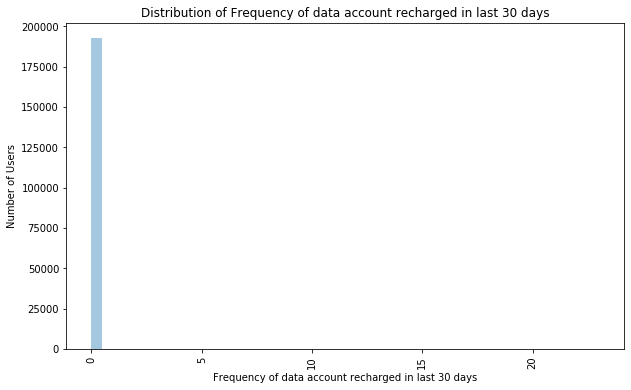

In [116]:
plt.figure(figsize=(10,6))
sns.distplot(df["fr_da_rech30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Frequency of data account recharged in last 30 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Frequency of data account recharged in last 30 days')

The above plot shows that a very high majority of data points are zero and this feature does not reveal anything, so let's drop it

In [117]:
df.shape

(192945, 32)

In [118]:
df.drop("fr_da_rech30", axis=1,inplace=True)
df.shape

(192945, 31)

23. Let's look at the Number of times data account got recharged in last 90 days

Text(0.5, 1.0, 'Distribution of Number of times data account got recharged in last 90 days')

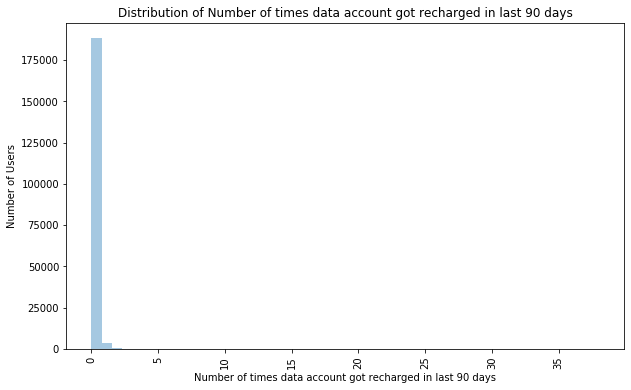

In [119]:
plt.figure(figsize=(10,6))
sns.distplot(df["cnt_da_rech90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Number of times data account got recharged in last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of times data account got recharged in last 90 days')

The above plot shows that a very high majority of data points are zero and this feature does not reveal anything, so let's drop it

In [120]:
df.shape

(192945, 31)

In [121]:
df.drop("cnt_da_rech90", axis=1,inplace=True)
df.shape

(192945, 30)

24. Let's look at the Frequency of data account recharged in last 90 days

Text(0.5, 1.0, 'Distribution of Frequency of data account recharged in last 90 days')

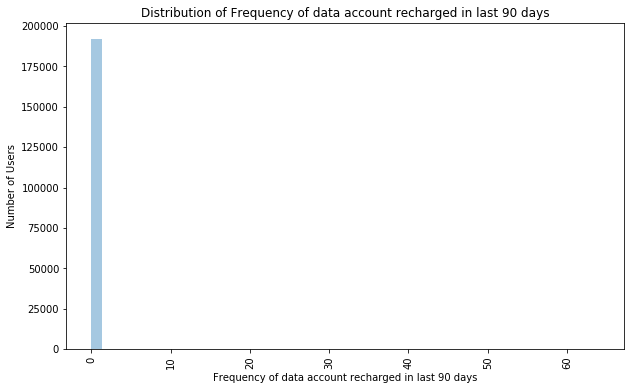

In [122]:
plt.figure(figsize=(10,6))
sns.distplot(df["fr_da_rech90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Frequency of data account recharged in last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Frequency of data account recharged in last 90 days')

The above plot shows that a very high majority of data points are zero and this feature does not reveal anything, so let's drop it

In [123]:
df.shape

(192945, 30)

In [124]:
df.drop("fr_da_rech90", axis=1,inplace=True)
df.shape

(192945, 29)

25. Let's look at the Number of loans taken by user in last 30 days

Text(0.5, 1.0, 'Distribution of Number of loans taken by user in last 30 days')

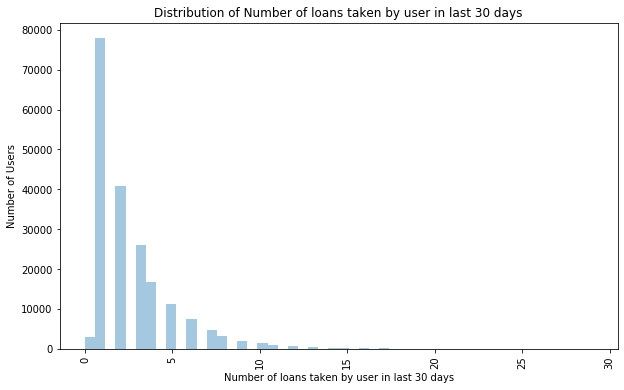

In [70]:
plt.figure(figsize=(10,6))
sns.distplot(df["cnt_loans30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Number of loans taken by user in last 30 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of loans taken by user in last 30 days')

From the above plot, majority of the users have taken lesser number of loans over the last 30 days or very few users have taken higher number of loans

Let's look at the Number of loans taken by user in last 30 days as per default status

Text(0.5, 1.0, 'Number of loans taken by user in last 30 days vs Default Status - Boxplot')

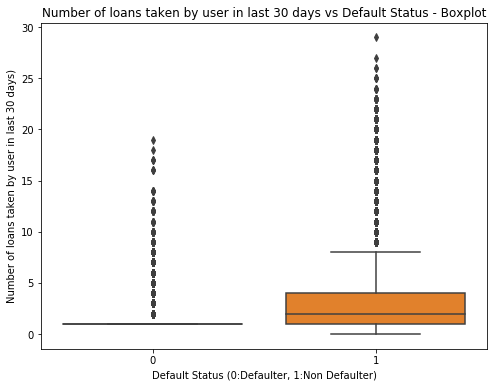

In [71]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="cnt_loans30",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Number of loans taken by user in last 30 days)')
plt.title('Number of loans taken by user in last 30 days vs Default Status - Boxplot')

From the above boxplot, the defaulters have taken relatively very less number of loans over the last 30 days, this also implies that people who take higher number of loans are generally more credible

26. Let's look at the Total amount of loans taken by user in last 30 days

Text(0.5, 1.0, 'Distribution of Total amount of loans taken by user in last 30 days')

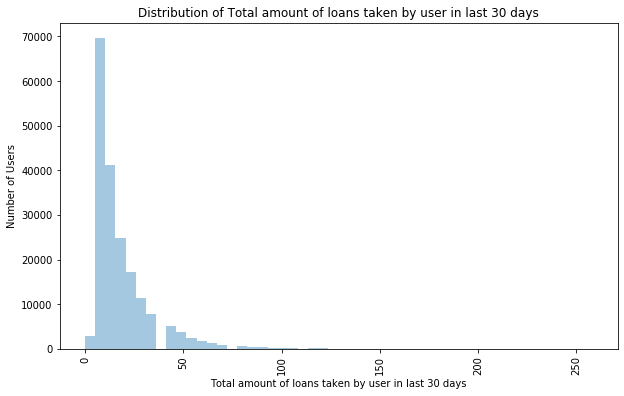

In [127]:
plt.figure(figsize=(10,6))
sns.distplot(df["amnt_loans30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Total amount of loans taken by user in last 30 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Total amount of loans taken by user in last 30 days')

The above plot shows the presence of outliers so let's remove them

In [128]:
df.shape

(192945, 29)

In [129]:
df = df.drop(df[(df.amnt_loans30 > 130)].index)
df.shape

(192804, 29)

Let's look at the Total amount of loans taken by user in last 30 days again after removing outliers

Text(0.5, 1.0, 'Distribution of Total amount of loans taken by user in last 30 days')

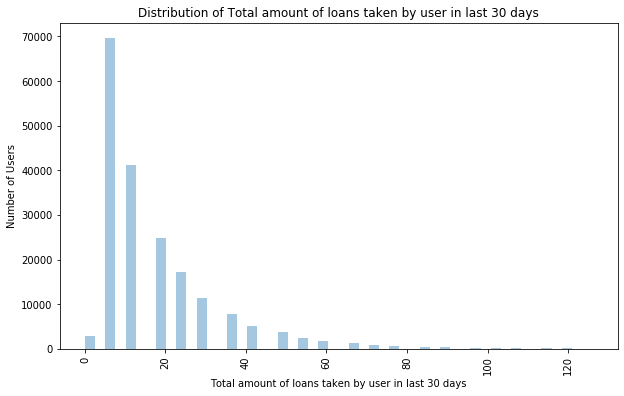

In [130]:
plt.figure(figsize=(10,6))
sns.distplot(df["amnt_loans30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Total amount of loans taken by user in last 30 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Total amount of loans taken by user in last 30 days')

Let's look at the Total amount of loans taken by user in last 30 days as per default status

Text(0.5, 1.0, 'Total amount of loans taken by user in last 30 days vs Default Status - Boxplot')

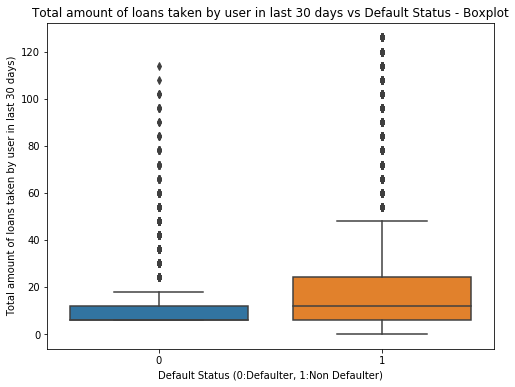

In [131]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="amnt_loans30",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Total amount of loans taken by user in last 30 days)')
plt.title('Total amount of loans taken by user in last 30 days vs Default Status - Boxplot')

From the above boxplot, the defaulters have taken relatively lesser total amount of loans over the last 30 days, this also implies that people who take higher total amount of loans are generally more credible

27. Let's look at the maximum amount of loan taken by the user in last 30 days

Text(0.5, 1.0, 'Distribution of maximum amount of loan taken by the user in last 30 days')

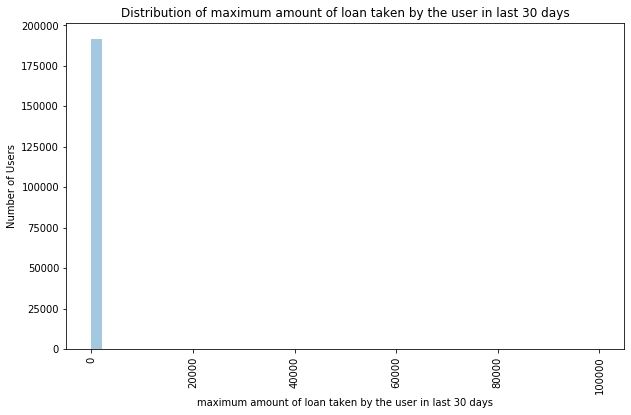

In [132]:
plt.figure(figsize=(10,6))
sns.distplot(df["maxamnt_loans30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('maximum amount of loan taken by the user in last 30 days')
plt.ylabel('Number of Users')
plt.title('Distribution of maximum amount of loan taken by the user in last 30 days')

Maximum amount of loan taken by the user in last 30 days column contain a lot of garbage values i.e. extremely high numbers, so let's drop them

In [133]:
df.shape

(192804, 29)

In [134]:
df = df.drop(df[(df.maxamnt_loans30 > 13)].index)
df.shape

(191844, 29)

Let's look at the maximum amount of loan taken by the user in last 30 days again after removing outliers

Text(0.5, 1.0, 'Distribution of maximum amount of loan taken by the user in last 30 days')

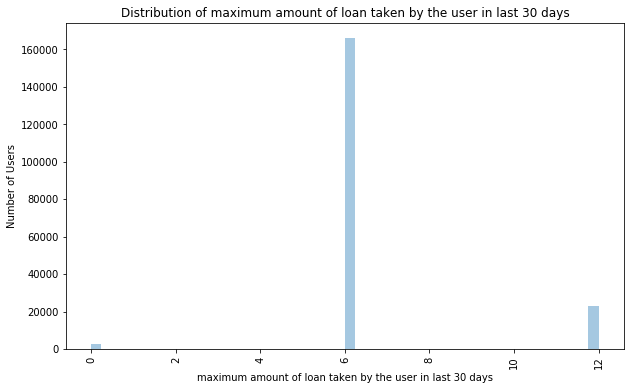

In [135]:
plt.figure(figsize=(10,6))
sns.distplot(df["maxamnt_loans30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('maximum amount of loan taken by the user in last 30 days')
plt.ylabel('Number of Users')
plt.title('Distribution of maximum amount of loan taken by the user in last 30 days')

Loans of values 6 & 12 Indonesian Rupiah were granted to users, also most users took loans of value 6 Rupiah

Let's look at the maximum amount of loan taken by the user in last 30 days as per default status

Text(0.5, 1.0, 'Credit default as per maximum amount of loan taken by the user in last 30 days')

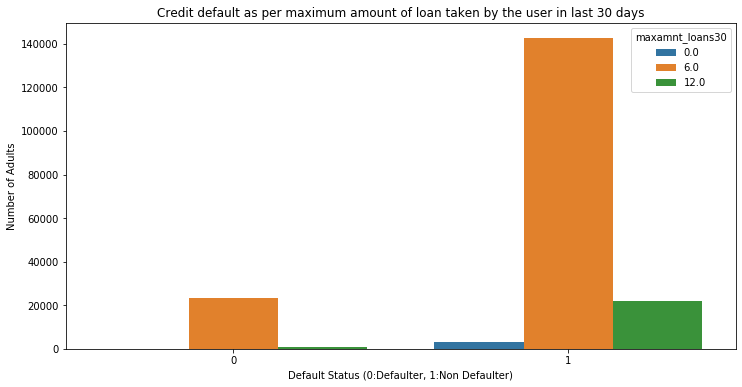

In [136]:
plt.figure(figsize=(12,6))
sns.countplot(x="label",hue="maxamnt_loans30", data = df)
plt.ylabel('Number of Adults')
plt.title('education_level as per Income>50K - Barplot')
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.title('Credit default as per maximum amount of loan taken by the user in last 30 days')

From the above plot, 6 Rupiah loans were most commonly defaulted

28. Let's look at the Median of amounts of loan taken by the user in last 30 days

Text(0.5, 1.0, 'Distribution of Median of amounts of loan taken by the user in last 30 days')

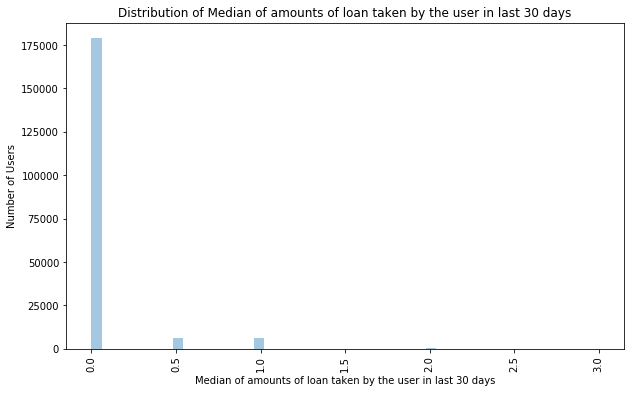

In [137]:
plt.figure(figsize=(10,6))
sns.distplot(df["medianamnt_loans30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Median of amounts of loan taken by the user in last 30 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Median of amounts of loan taken by the user in last 30 days')

The above plot shows that a very high majority of data points are zero and this feature does not reveal anything, so let's drop it

In [138]:
df.shape

(191844, 29)

In [139]:
df.drop("medianamnt_loans30", axis=1,inplace=True)
df.shape

(191844, 28)

28. Let's look at the Number of loans taken by user in last 90 days

Text(0.5, 1.0, 'Distribution of Number of loans taken by user in last 90 days')

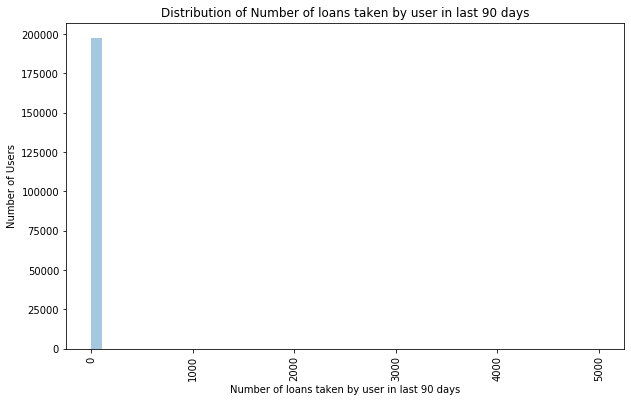

In [72]:
plt.figure(figsize=(10,6))
sns.distplot(df["cnt_loans90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Number of loans taken by user in last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of loans taken by user in last 90 days')

Number of loans taken by user in last 90 days column contains a lot of garbage values i.e. extremely high numbers, so let's drop them

In [73]:
df.shape

(198456, 35)

In [74]:
df = df.drop(df[(df.cnt_loans90 > 72)].index)
df.shape

(197457, 35)

Let's look at the Number of loans taken by the user in last 90 days again after removing outliers

Text(0.5, 1.0, 'Distribution of Number of loans taken by user in last 90 days')

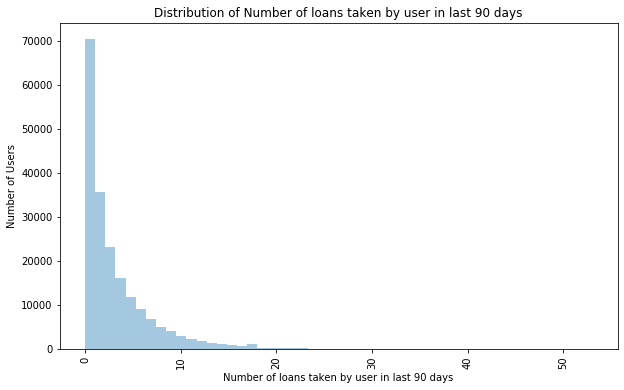

In [75]:
plt.figure(figsize=(10,6))
sns.distplot(df["cnt_loans90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Number of loans taken by user in last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of loans taken by user in last 90 days')

From the above plot, majority of the users took lesser number of loans over the last 90 days

Let's look at the Number of loans taken by user in last 90 days as per default status

Text(0.5, 1.0, 'Number of loans taken by user in last 90 days vs Default Status - Boxplot')

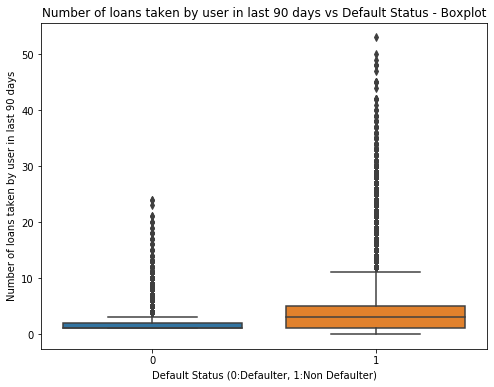

In [76]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="cnt_loans90",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Number of loans taken by user in last 90 days')
plt.title('Number of loans taken by user in last 90 days vs Default Status - Boxplot')

From the above plots, Number of loans taken by user in last 90 days is relatively lower for the defaulters, this implies that people with higher Number of loans taken are generally more credible

29. Let look at the Total amount of loans taken by user in last 90 days

Text(0.5, 1.0, 'Distribution of Total amount of loans taken by user in last 90 days')

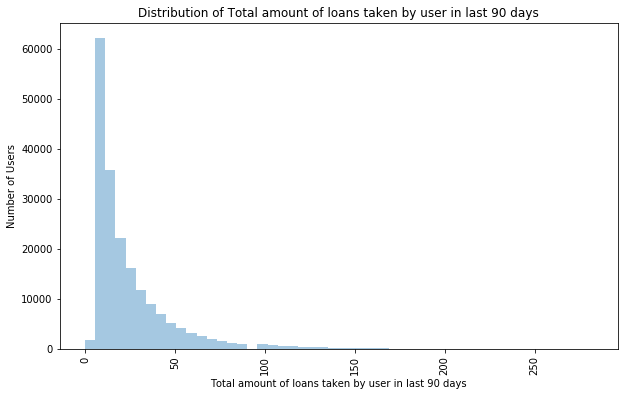

In [146]:
plt.figure(figsize=(10,6))
sns.distplot(df["amnt_loans90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Total amount of loans taken by user in last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Total amount of loans taken by user in last 90 days')

Total amount of loans taken by user in last 90 days column contains a lot of high outlier values, so let's drop them

In [147]:
df.shape

(190887, 28)

In [148]:
df = df.drop(df[(df.amnt_loans90 > 200)].index)
df.shape

(190835, 28)

Let look at the Total amount of loans taken by user in last 90 days again after removing outliers

Text(0.5, 1.0, 'Distribution of Total amount of loans taken by user in last 90 days')

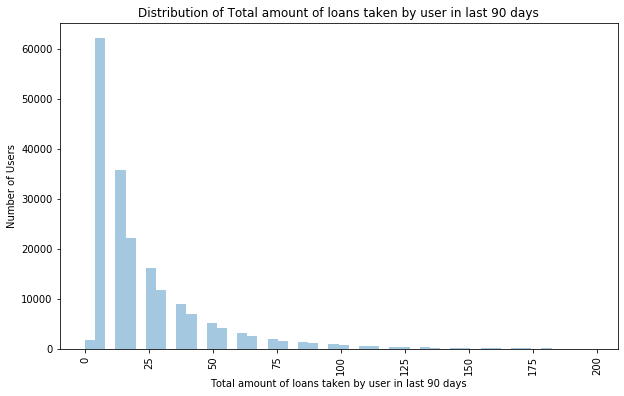

In [149]:
plt.figure(figsize=(10,6))
sns.distplot(df["amnt_loans90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Total amount of loans taken by user in last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Total amount of loans taken by user in last 90 days')

From the above plot, majority of the users took low Total amount of loans over the last 90 days

Let's look at the Total amount of loans taken by user in last 90 days as per default status

Text(0.5, 1.0, 'Total amount of loans taken by user in last 90 days vs Default Status - Boxplot')

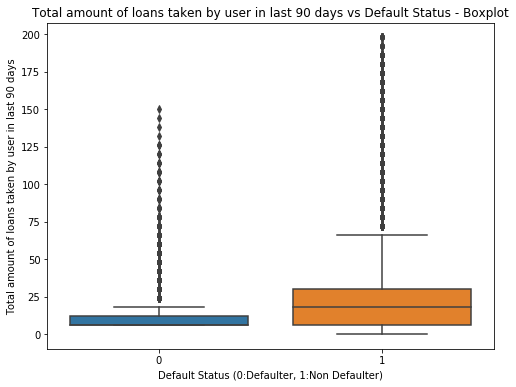

In [150]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="amnt_loans90",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Total amount of loans taken by user in last 90 days')
plt.title('Total amount of loans taken by user in last 90 days vs Default Status - Boxplot')

From the above plot, Total amount of loans taken by user in last 90 days is relatively lower for the defaulters, this implies that people with higher Total amount of loans are generally more credible

31. Let's look at the maximum amount of loan taken by the user in last 90 days

Text(0.5, 1.0, 'Distribution of maximum amount of loan taken by the user in last 90 days')

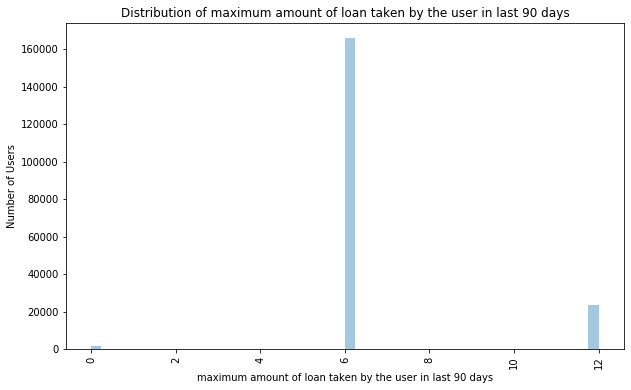

In [151]:
plt.figure(figsize=(10,6))
sns.distplot(df["maxamnt_loans90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('maximum amount of loan taken by the user in last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of maximum amount of loan taken by the user in last 90 days')

Loans of values 6 & 12 Indonesian Rupiah were granted to users, also most users took loans of value 6 Rupiah

Let's look at the maximum amount of loan taken by the user in last 90 days as per default status

Text(0.5, 1.0, 'Credit default as per maximum amount of loan taken by the user in last 90 days')

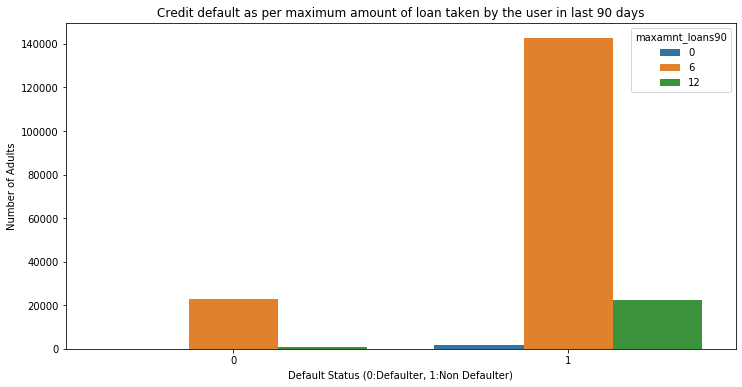

In [152]:
plt.figure(figsize=(12,6))
sns.countplot(x="label",hue="maxamnt_loans90", data = df)
plt.ylabel('Number of Adults')
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.title('Credit default as per maximum amount of loan taken by the user in last 90 days')

From the above plot, 6 Rupiah loans were most commonly defaulted

32. Let look at the Median of amounts of loan taken by the user in last 90 days

Text(0.5, 1.0, 'Distribution of Median of amounts of loan taken by the user in last 90 days')

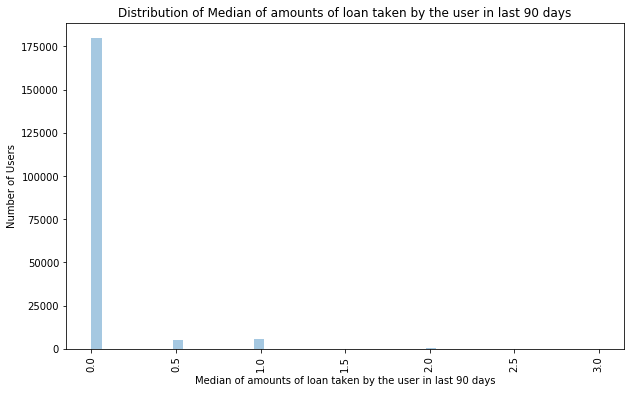

In [153]:
plt.figure(figsize=(10,6))
sns.distplot(df["medianamnt_loans90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Median of amounts of loan taken by the user in last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Median of amounts of loan taken by the user in last 90 days')

The above plot shows that a very high majority of data points are zero and this feature does not reveal anything, so let's drop it

In [154]:
df.shape

(190835, 28)

In [156]:
df.drop("medianamnt_loans90", axis=1,inplace=True)
df.shape

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Shahbaz\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-156-179b6240812c>", line 1, in <module>
    df.drop("medianamnt_loans90", axis=1,inplace=True)
  File "C:\Users\Shahbaz\anaconda3\lib\site-packages\pandas\core\frame.py", line 3997, in drop
    errors=errors,
  File "C:\Users\Shahbaz\anaconda3\lib\site-packages\pandas\core\generic.py", line 3936, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "C:\Users\Shahbaz\anaconda3\lib\site-packages\pandas\core\generic.py", line 3970, in _drop_axis
    new_axis = axis.drop(labels, errors=errors)
  File "C:\Users\Shahbaz\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 5018, in drop
    raise KeyError(f"{labels[mask]} not found in axis")
KeyError: "['medianamnt_loans90'] not found in axis"

During handling of the above exception, a

KeyError: "['medianamnt_loans90'] not found in axis"

33. Let look at the Average payback time in days over last 30 days

Text(0.5, 1.0, 'Distribution of Average payback time in days over last 30 days')

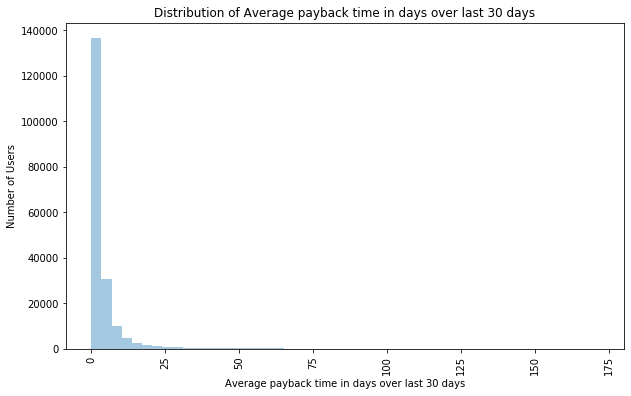

In [157]:
plt.figure(figsize=(10,6))
sns.distplot(df["payback30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Average payback time in days over last 30 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Average payback time in days over last 30 days')

Average payback time in days over last 30 days column contains columns contain a lot of high outlier values, so let's drop them

In [158]:
df.shape

(190835, 27)

In [159]:
df = df.drop(df[(df.payback30 > 70)].index)
df.shape

(190095, 27)

Let look at the Average payback time in days over last 30 days again after removing outliers

Text(0.5, 1.0, 'Distribution of Average payback time in days over last 30 days')

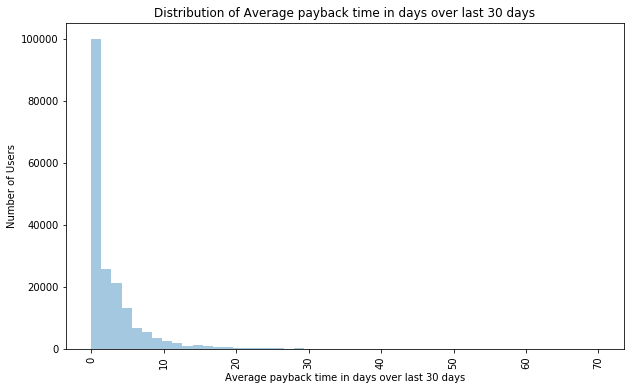

In [160]:
plt.figure(figsize=(10,6))
sns.distplot(df["payback30"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Average payback time in days over last 30 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Average payback time in days over last 30 days')

Majority of the users have very less payback time or very few users have higher payback time in days

Let's look at the Average payback time in days over last 30 days as per default status

Text(0.5, 1.0, 'Average payback time in days over last 30 days vs Default Status - Boxplot')

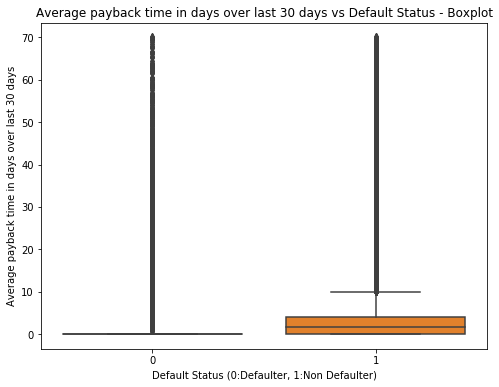

In [161]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="payback30",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Average payback time in days over last 30 days')
plt.title('Average payback time in days over last 30 days vs Default Status - Boxplot')

From the above plots, Average payback time in days over last 30 days is relatively lower for the defaulters, which is surprising. Perhaps the median is zero for defaulters because of a lot of zero entries in the column

34. Let's look at the Average payback time in days over last 90 days

Text(0.5, 1.0, 'Distribution of Average payback time in days over last 90 days')

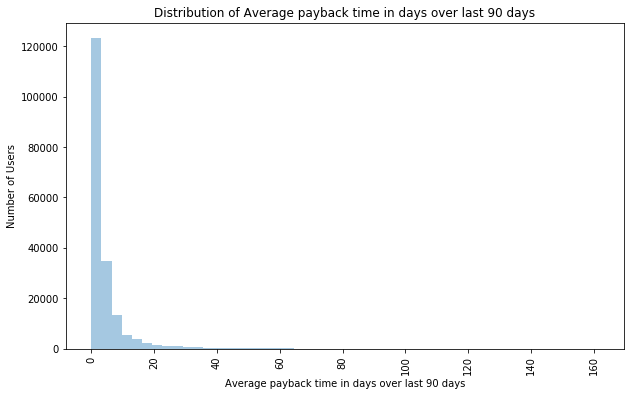

In [162]:
plt.figure(figsize=(10,6))
sns.distplot(df["payback90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Average payback time in days over last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Average payback time in days over last 90 days')

Average payback time in days over last 90 days column contains a lot of high outlier values, so let's drop them

In [163]:
df.shape

(190095, 27)

In [164]:
df = df.drop(df[(df.payback90 > 80)].index)
df.shape

(189877, 27)

Let look at the Average payback time in days over last 90 days again after removing outliers

Text(0.5, 1.0, 'Distribution of Average payback time in days over last 90 days')

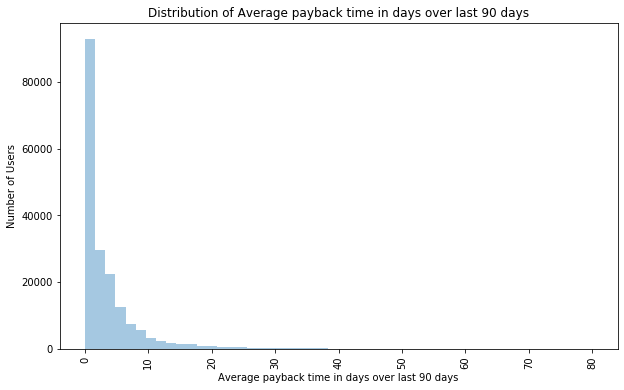

In [165]:
plt.figure(figsize=(10,6))
sns.distplot(df["payback90"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Average payback time in days over last 90 days')
plt.ylabel('Number of Users')
plt.title('Distribution of Average payback time in days over last 90 days')

Majority of the users have very less payback time or very few users have higher payback time in days

Let's look at the Average payback time in days over last 90 days as per default status

Text(0.5, 1.0, 'Average payback time in days over last 90 days vs Default Status - Boxplot')

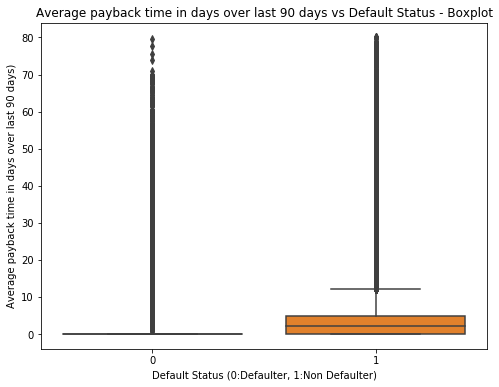

In [166]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="payback90",data=df)
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.ylabel('Average payback time in days over last 90 days)')
plt.title('Average payback time in days over last 90 days vs Default Status - Boxplot')

From the above plots, Average payback time in days over last 90 days is relatively lower for the defaulters, which is surprising. Perhaps the median is zero for defaulters because of a lot of zero entries in the column

35. Let's look at the contents of pcircle & pdate column

In [184]:
df['pcircle'].value_counts()

UPW    189877
Name: pcircle, dtype: int64

36. 

In [185]:
df['pdate'].value_counts()

2016-07-04    2911
2016-07-05    2834
2016-06-20    2832
2016-06-17    2812
2016-07-07    2807
              ... 
2016-08-18    1317
2016-06-04    1266
2016-08-19    1064
2016-08-20     739
2016-08-21     296
Name: pdate, Length: 82, dtype: int64

The columns pcircle (telecom circle) and pdate (date) does not offer any analytical info so let's drop them

In [167]:
df.shape

(189877, 27)

In [168]:
df.drop("pcircle",axis=1,inplace=True)
df.drop("pdate",axis=1,inplace=True)
df.shape

(189877, 25)

In [169]:
(209593-189877)*100/209593

9.40680270810571

Let's look into the shape of dataframe and number of defaulters in the dataset before modelling

1    166002
0     23875
Name: label, dtype: int64

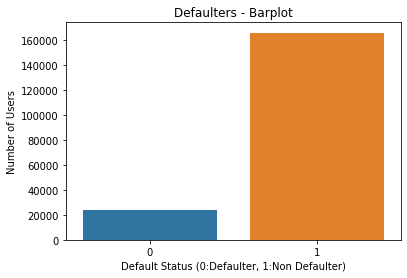

In [170]:
#Let;s look at the distribution of users who defaulted to those who did not
sns.countplot(df["label"])
plt.ylabel('Number of Users')
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.title('Defaulters - Barplot')
df['label'].value_counts()

In [191]:
#Checking for null values
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
payback30               0
payback90               0
dtype: int64

Checking the skewness in the data

In [215]:
df.skew()

label                  -2.257624
aon                     0.953956
daily_decr30            2.141871
daily_decr90            2.202648
rental30                2.973747
rental90                3.049878
last_rech_date_ma       3.555677
last_rech_amt_ma        2.239615
cnt_ma_rech30           1.865219
fr_ma_rech30            1.823291
sumamnt_ma_rech30       2.073981
medianamnt_ma_rech30    2.477567
cnt_ma_rech90           1.994583
fr_ma_rech90            2.112478
sumamnt_ma_rech90       2.094436
medianamnt_ma_rech90    2.496412
medianmarechprebal90    3.264885
cnt_loans30             2.155381
amnt_loans30            2.167539
maxamnt_loans30         1.466183
cnt_loans90             2.368918
amnt_loans90            2.380648
maxamnt_loans90         1.730185
payback30               4.757274
payback90               4.233815
dtype: float64

We could further clean the dataset and remove all values having z>3 but we have already removed almost 9% of the total cases available in order to clean the data, so to minimize data loss we proceed without removing values having z>3

In [233]:
X=df.drop("label", axis=1)
y=df["label"]

Scaling the input data

In [234]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[-0.77737822, -0.24524709, -0.27969598, ..., -0.32633661,
         4.23070591,  3.39857636],
       [ 0.10743735,  1.0105134 ,  0.80834569, ...,  2.57336937,
        -0.50151204, -0.52720792],
       [-0.24849982, -0.47474631, -0.47991769, ..., -0.32633661,
        -0.50151204, -0.52720792],
       ...,
       [ 0.71273163,  0.97188774,  0.78187605, ...,  2.57336937,
         0.15120768, -0.00828242],
       [ 2.15860071,  1.06123554,  0.86234425, ...,  2.57336937,
        -0.50151204,  0.89419673],
       [ 1.85494809, -0.04659679, -0.10319125, ...,  2.57336937,
        -0.50151204, -0.52720792]])

Finding best random_state for Linear Regression Model

In [235]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_accuracy_score=0
for r_state in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.25,random_state=r_state)
    logr = LogisticRegression()
    logr.fit(X_train,y_train)
    y_pred = logr.predict(X_test)
    accu_scr = accuracy_score(y_test,y_pred)
    if accu_scr>max_accuracy_score:
        max_accuracy_score = accu_scr
        final_r_state = r_state
    
print("max accuracy score corresponding to random state",final_r_state,"is",max_accuracy_score)

max accuracy score corresponding to random state 20 is 0.8782810195913209


In [236]:
#splitting the test & train sets
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.25,random_state=20)

In [237]:
print(X_train.shape,"\n",X_test.shape)

(142407, 24) 
 (47470, 24)


Testing performance of different classifier algorithms

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [239]:
LR = LogisticRegression()
GNB = GaussianNB()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
XGB = xgb.XGBClassifier()

In [240]:
models = []
models.append(("LogisticRegression", LR))
models.append(("GaussianNB", GNB))
models.append(("RandomForestClassifier", RFC))
models.append(("AdaBoostClassifier", ABC))
models.append(("GradientBoostingClassifier", GBC))
models.append(("XGBoostClassifier", XGB))

In [241]:
# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, random_state=20, shuffle=True)

***************** LogisticRegression ******************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score =  0.8782810195913209


Cross val score =  0.8749664314686546


roc_auc_score =  0.5237686701648955


Classification Report
               precision    recall  f1-score   support

           0       0.56      0.05      0.10      5848
           1       0.88      0.99      0.93     41622

    accuracy                           0.88     47470
   macro avg       0.72      0.52      0.52     47470
weighted avg       0.84      0.88      0.83     47470



Confusion Matrix 
[[  312  5536]
 [  242 41380]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** GaussianNB ******************



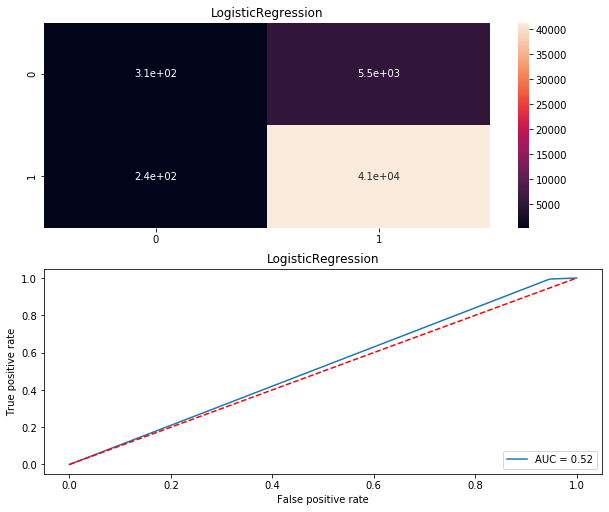

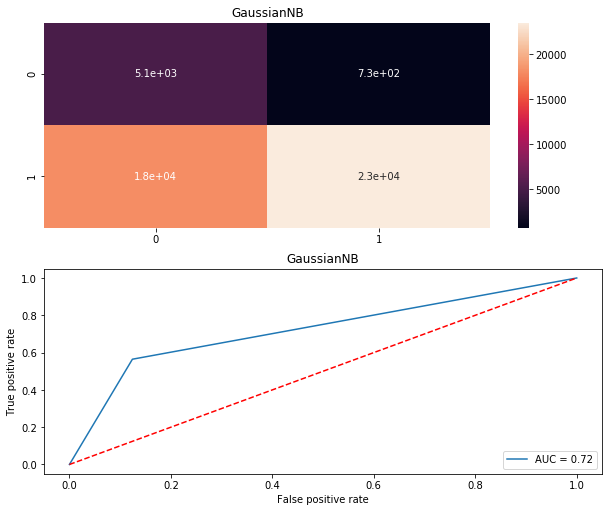

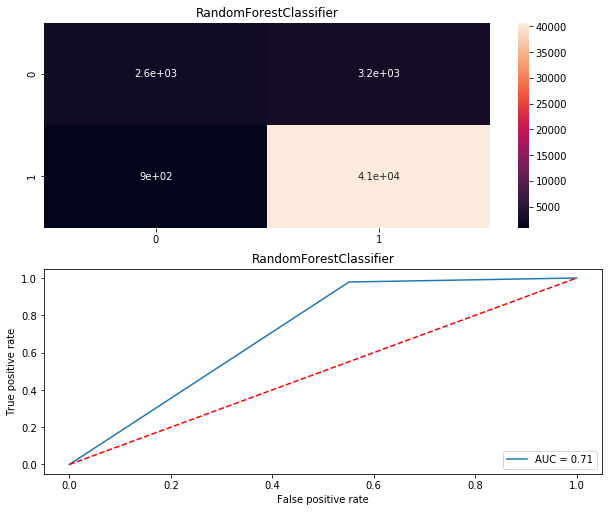

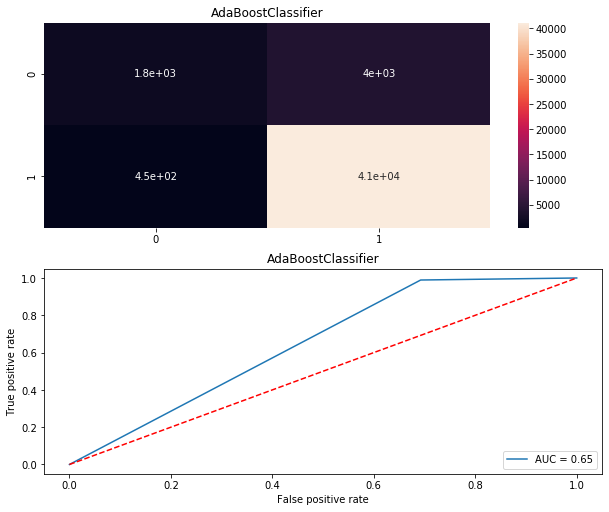

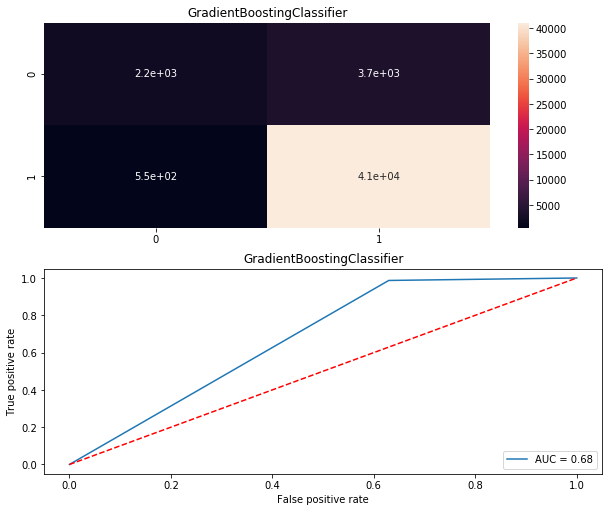

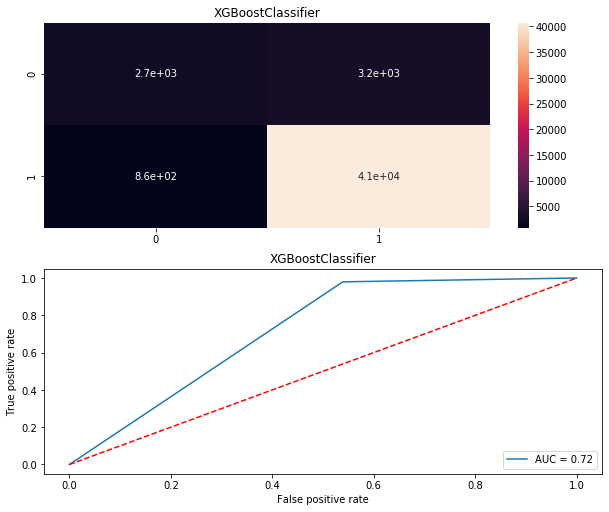

In [242]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    AS = accuracy_score(y_test,pre)
    print("Accuracy Score = ",AS)
    score.append(AS*100)
    print("\n")
    sc = cross_val_score(model,X,y,cv=10,scoring="accuracy").mean()
    print("Cross val score = ",sc)
    cvs.append(sc*100)
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print("Classification Report\n", classification_report(y_test,pre))
    print("\n")
    cm = confusion_matrix(y_test,pre)
    print("Confusion Matrix \n{}".format(cm))
    print("\n")
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")

In [213]:
5122+726

5848

In [205]:
result = pd.DataFrame({"Model": Model, "Accuracy Socre": score, "Cross val score": cvs, 'ROC AUC Score': rocscore})
result

,Model,Accuracy Socre,Cross val score,ROC AUC Score
0,LogisticRegression,87.573204,87.496643,52.494905
1,GaussianNB,60.219086,60.596074,71.782609
2,RandomForestClassifier,91.194439,91.223266,71.397623
3,AdaBoostClassifier,90.389720,90.408527,64.604128
4,GradientBoostingClassifier,90.969033,90.943084,67.633380
5,XGBoostClassifier,91.234464,91.231693,69.996457


While RandomForestClassifier nad XGBoostClassifier give very good accuracy and cross validation scores they fail to classify many defaulters as displayed in Confusion Matrices, so accuracy score and cross validation score are not the best parameters for our business application. In this project we are mainly interested in detecting the defaulters and the GaussianMB Model performs far better than any other model in classifying defaulters. The GaussianNB Model Classifies 5122 out of 5848 total defaulters in the test set. While the precision score which measures the accuracy of classifying the defaulters correctly out of the total defaulters classified is low (0.22) for GaussianNB Model (Precision is highest for GradientBoostingClassifier: 0.80), the Recall Score which measures the accuracy of classifying all the defaulters is highest (0.88) for GaussianNB Model and no other model gives a better recall score. In our business application, we need to correctly classify all the possible defaulters and GaussianNB Model does that better than all but there is a trade off that correctly identifying all defaulters comes with a cost of incorrectly classifying many non defaulters which is why the precision and accuracy score are low. The Area Under ROC Curve (AUC) Score is also highest for GaussianNB indicating better performance than other models.

Let's perform hyperparameter tuning for the selected GaussianNB Model

In [510]:
from sklearn.model_selection import GridSearchCV
parameters = {
                'priors': [None],
                'var_smoothing': [0.00000001, 0.00000005, 0.0000005]
             }
grid = GridSearchCV(estimator=GNB,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.var_smoothing)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'priors': [None],
                         'var_smoothing': [1e-08, 5e-08, 5e-07]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.6207209301745904
1e-08
{'priors': None, 'var_smoothing': 1e-08}


In [512]:
GNB2 = GaussianNB(var_smoothing=1e-08)
GNB2.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-08)

In [513]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(GNB2,'micro_credit_defaulters.pkl')

['micro_credit_defaulters.pkl']